# Preambule

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import javabridge
import bioformats as bf
javabridge.start_vm(class_path=bf.JARS)
from collections import OrderedDict
import pandas as pd
from scipy.stats import distributions as dst
import numpy as np

%config Completer.use_jedi = False

from matplotlib.patches import Rectangle

omeTag = "http://www.openmicroscopy.org/Schemas/OME/2016-06"

# def printRecur(root, maxLevel=np.inf, stoppingCrit=None):
#     """Recursively prints the tree."""
#     global level
#     try: Levels[level] += 1
#     except: pass
#     if stoppingCrit is not None:
#         if stoppingCrit(Levels):
#             return None
#     title = root.tag.title().lower().replace(omeTag.lower(),"").replace("{}","")
#     txt = root.text
#     if txt is None: txt = ""
#     else: txt =  ": "+txt
#     count = ".".join(Levels.astype(int).astype(str))#.rstrip(".0")
#     isplit = count.find(".0")
#     if isplit>0:
#         count = count[:isplit]
#     count += (10-len(count))*" "
#     print (count, end="")
#     print (' '*4*level,title,txt)
#     level += 1
#     if level<=maxLevel:
#         for elem in root:
#             printRecur(elem, maxLevel=maxLevel,stoppingCrit=stoppingCrit)
#     level -= 1
#     Levels[level+1:] = 0

# from sys import path as syspath
# from os.path import expanduser
# syspath.append(expanduser("~/Seafile/functions/"))
# from general_functions import autocorr, tally

# from general_functions import moving_average

In [2]:
def getDimensions(idx_):
    Pixels = xml.image(index=idx_).Pixels
    return sum([[
        (coord       ,getattr(Pixels,"PhysicalSize"+coord)),
        ("[%s]"%coord,getattr(Pixels,"PhysicalSize%sUnit"%coord))]
        for coord in "XYZ"],[])

In [3]:
def getTimes(idx_):
    Pixels = xml.image(index=idx_).Pixels
    nPlanes = Pixels.get_plane_count()
    return np.array([Pixels.Plane(i).DeltaT for i in range(nPlanes)])

In [4]:
def getApparentFreq(idx_):
    Pixels = xml.image(index=idx_).Pixels
    nPlanes = Pixels.get_plane_count()
    if nPlanes==1:
        return 0
    else:
        return (nPlanes-1)/Pixels.Plane(nPlanes-1).DeltaT

## Parse metadata

In [5]:
dataDir = "./data/"
filename = "Experiment.lif"

rdr = bf.ImageReader(dataDir+filename, perform_init=True)
md = bf.get_omexml_metadata(dataDir+filename)
xml = bf.OMEXML(md)
Nimages = xml.get_image_count()

In [6]:
%%time
FirstFrames = []
mdf = []
for i in range(Nimages):
    im = xml.image(index=i)
    tmp = OrderedDict([(attrib,getattr(im,attrib)) for attrib in ["Name","AcquisitionDate"]])
    for dim in "XYTCZ":
        tmp["Size"+dim] = getattr(im.Pixels, "Size"+dim)
    try:
        tmp["freq"] = getApparentFreq(i)
    except:
        pass
    tmp.update(getDimensions(i))
    mdf += [tmp]
    FirstFrames += [rdr.read(series=i, rescale=False,t=0)]

mdf = pd.DataFrame(mdf)

try:
    mdf["AcquisitionDate"] = pd.to_datetime(mdf["AcquisitionDate"])
except:
    pass

mdf#.loc[:,["X","Y","T","inferedTimes"]]

CPU times: user 7.59 s, sys: 41.3 ms, total: 7.63 s
Wall time: 7.45 s


Name     AcquisitionDate  SizeX  SizeY  SizeT  SizeC  SizeZ  \
0    Image007 2019-05-16 10:50:30   1024   1024      1      1      1   
1    Image008 2019-05-16 10:51:47    512    512      1      1      1   
2    Image010 2019-05-16 10:52:46   1024   1024      1      1      1   
3    Image012 2019-05-16 10:53:17   1024   1024      1      1      1   
4   Series015 2019-05-16 10:54:37    512    512    780      1      1   
5   Series016 2019-05-16 11:08:23    256    256  24521      1      1   
6    Image018 2019-05-16 11:52:26   1024   1024      1      1      1   
7   Series021 2019-05-16 11:54:58     64     64   8785      1      1   
8    Image023 2019-05-16 12:00:18   1024   1024      1      1      1   
9    Image025 2019-05-16 12:01:21   1024   1024      1      1      1   
10  Series028 2019-05-16 12:03:07     64     64  99351      1      1   
11   Image030 2019-05-16 12:42:11   1024   1024      1      1      1   
12   Image032 2019-05-16 12:44:45   1024   1024      1      1      1   
13   Image033 2019-05-16 12:44:54   1024   1024      1      1      1   
14  Series035 2019-05-16 12:45:48    512    512    890      1      1   
15   Image038 2019-05-16 13:07:59   1024   1024      1      1      1   
16  Series039 2019-05-16 13:09:09    512    512   4533      1      1   
17  Series050 2019-05-16 14:12:23    512     32    672      1      1   
18  Series051 2019-05-16 14:14:16    512     32  12524      1      1   
19  Series052 2019-05-16 14:17:36   1024     16    685      1      1   
20  Series054 2019-05-16 14:19:17   1024     32   3986      1      1   
21  Series058 2019-05-16 14:30:06     64      8      1      1      1   
22  Series059 2019-05-16 14:31:10     64   8192     14      1      1   
23  Series060 2019-05-16 14:32:16     64      8      1      1      1   
24  Series061 2019-05-16 14:37:34     64    200      5      1      1   
25  Series062 2019-05-16 14:40:31     64   8192      2      1      1   
26  Series063 2019-05-16 14:40:45     64   8192      2      1      1   
27  Series064 2019-05-16 14:42:04     64    200     82      1      1   
28  Series065 2019-05-16 14:42:26     64    200    582      1      1   
29   Image067 2019-05-16 14:52:53   1024   1024      1      1      1   
30   Image076 2019-05-16 15:00:26    512    300      1      1      1   
31  Series077 2019-05-16 15:01:24    512    300    660      1      1   
32  Series079 2019-05-16 15:08:29    512   2012     84      1      1   
33  Series085 2019-05-16 15:20:49    512    512     13      1     18   
34  Series087 2019-05-16 15:22:53    512    512     39      1      4   

         freq         X [X]         Y [Y]       Z   [Z]  
0    0.000000  0.445632  µm  0.445632  µm     NaN  None  
1    0.000000  0.892137  µm  0.892137  µm     NaN  None  
2    0.000000  0.445632  µm  0.445632  µm     NaN  None  
3    0.000000  0.445632  µm  0.445632  µm     NaN  None  
4    0.990297  0.892137  µm  0.892137  µm     NaN  None  
5    9.914698  1.787773  µm  1.787773  µm     NaN  None  
6    0.000000  0.342514  µm  0.342514  µm     NaN  None  
7   49.463358  5.561779  µm  5.561779  µm     NaN  None  
8    0.000000  0.134147  µm  0.134147  µm     NaN  None  
9    0.000000  0.134147  µm  0.134147  µm     NaN  None  
10  49.472977  2.178284  µm  2.178284  µm     NaN  None  
11   0.000000  0.439878  µm  0.439878  µm     NaN  None  
12   0.000000  0.324635  µm  0.324635  µm     NaN  None  
13   0.000000  0.324635  µm  0.324635  µm     NaN  None  
14   0.990313  0.649905  µm  0.649905  µm     NaN  None  
15   0.000000  0.410199  µm  0.410199  µm     NaN  None  
16   1.978398  0.821201  µm  0.821201  µm     NaN  None  
17   9.892670  0.489878  µm  0.489878  µm     NaN  None  
18  82.439682  0.489878  µm  0.489878  µm     NaN  None  
19  82.439427  0.244700  µm  0.244700  µm     NaN  None  
20  49.775169  0.244700  µm  0.244700  µm     NaN  None  
21   0.000000  2.673140  µm  0.000214  µm     NaN  None  
22   0.697799  2.673140  µm  0.000188  µm     NaN  None  
23   0.000000  2.673140 

# Parse Annotations

In [7]:
%%time
import xml.etree.ElementTree as ET
realXML = xml.to_xml()
with open("tmp.xml","w") as f:
    f.write(realXML)
tree = ET.ElementTree(file="tmp.xml")
root = tree.getroot()
annotations = root[-1]

allFeatures = np.unique([" ".join(elem.text.split()[1:]) for elem in annotations.iter("{%s}"%omeTag+"Key")])

features = pd.DataFrame(index=mdf.Name,columns=allFeatures)

for elem in annotations.iter("{%s}"%omeTag + "OriginalMetadata"):
    keys   = elem.findall(   "{%s}"%omeTag + "Key")
    values = elem.findall(   "{%s}"%omeTag + "Value")
    assert len(keys)==len(values)
    for k,v in zip(keys,values):
        name = k.text.split()[0]
        feature = " ".join(k.text.split()[1:])
        features.loc[name, feature] = v.text

for ft in allFeatures:
    try:    features[ft] = pd.to_numeric(features[ft], downcast="float")
    except: continue
    try:
        v = features[ft]
        vint = pd.to_numeric(v, downcast="integer")
        if np.sum((vint-v)**2)==0:
            features[ft] = vint
    except:
        continue

CPU times: user 7.47 s, sys: 288 ms, total: 7.76 s
Wall time: 7.93 s


In [8]:
## split into constant and variable features (typically not necessary)
# constFeatures = OrderedDict([(ft,features[ft].values[0]) for ft in allFeatures if len(features[ft].unique())==1])

# # assert all numerical constanct values do NOT have NANs
# assert np.all([np.isfinite(features[ft].values) for ft in constFeatures if type(constFeatures[ft])!=str])

# varFeatures = [ft for ft in allFeatures if ft not in constFeatures]

# features = features[varFeatures]

# len(features.columns)

In [9]:
totTime = (mdf.SizeT/mdf.freq).values
totTime[~np.isfinite(totTime)] = np.nan

mdf["totalT"] = totTime

nameAlias = OrderedDict([(ft,ft.split("|")[-1].replace(" ","_").replace("#","")) for ft in features.columns])

lineAvg = features.rename(columns=nameAlias)['nAverageLine_1']
# .idxsort()

mdf = mdf.join(lineAvg,on="Name")

tmp = features.rename(nameAlias,axis="columns")["csScanMode_1"].copy()
mdf["ScanMode"] = tmp.values

In [10]:
mdf.query("ScanMode=='xyt'")

Name     AcquisitionDate  SizeX  SizeY  SizeT  SizeC  SizeZ  \
0    Image007 2019-05-16 10:50:30   1024   1024      1      1      1   
1    Image008 2019-05-16 10:51:47    512    512      1      1      1   
2    Image010 2019-05-16 10:52:46   1024   1024      1      1      1   
3    Image012 2019-05-16 10:53:17   1024   1024      1      1      1   
4   Series015 2019-05-16 10:54:37    512    512    780      1      1   
5   Series016 2019-05-16 11:08:23    256    256  24521      1      1   
6    Image018 2019-05-16 11:52:26   1024   1024      1      1      1   
7   Series021 2019-05-16 11:54:58     64     64   8785      1      1   
8    Image023 2019-05-16 12:00:18   1024   1024      1      1      1   
9    Image025 2019-05-16 12:01:21   1024   1024      1      1      1   
10  Series028 2019-05-16 12:03:07     64     64  99351      1      1   
11   Image030 2019-05-16 12:42:11   1024   1024      1      1      1   
12   Image032 2019-05-16 12:44:45   1024   1024      1      1      1   
13   Image033 2019-05-16 12:44:54   1024   1024      1      1      1   
14  Series035 2019-05-16 12:45:48    512    512    890      1      1   
15   Image038 2019-05-16 13:07:59   1024   1024      1      1      1   
16  Series039 2019-05-16 13:09:09    512    512   4533      1      1   
17  Series050 2019-05-16 14:12:23    512     32    672      1      1   
18  Series051 2019-05-16 14:14:16    512     32  12524      1      1   
19  Series052 2019-05-16 14:17:36   1024     16    685      1      1   
20  Series054 2019-05-16 14:19:17   1024     32   3986      1      1   
29   Image067 2019-05-16 14:52:53   1024   1024      1      1      1   

         freq         X [X]         Y [Y]   Z   [Z]       totalT  \
0    0.000000  0.445632  µm  0.445632  µm NaN  None          NaN   
1    0.000000  0.892137  µm  0.892137  µm NaN  None          NaN   
2    0.000000  0.445632  µm  0.445632  µm NaN  None          NaN   
3    0.000000  0.445632  µm  0.445632  µm NaN  None          NaN   
4    0.990297  0.892137  µm  0.892137  µm NaN  None   787.642800   
5    9.914698  1.787773  µm  1.787773  µm NaN  None  2473.196859   
6    0.000000  0.342514  µm  0.342514  µm NaN  None          NaN   
7   49.463358  5.561779  µm  5.561779  µm NaN  None   177.606217   
8    0.000000  0.134147  µm  0.134147  µm NaN  None          NaN   
9    0.000000  0.134147  µm  0.134147  µm NaN  None          NaN   
10  49.472977  2.178284  µm  2.178284  µm NaN  None  2008.187213   
11   0.000000  0.439878  µm  0.439878  µm NaN  None          NaN   
12   0.000000  0.324635  µm  0.324635  µm NaN  None          NaN   
13   0.000000  0.324635  µm  0.324635  µm NaN  None          NaN   
14   0.990313  0.649905  µm  0.649905  µm NaN  None   898.705781   
15   0.000000  0.410199  µm  0.410199  µm NaN  None          NaN   
16   1.978398  0.821201  µm  0.821201  µm NaN  None  2291.247460   
17   9.892670  0.489878  µm  0.489878  µm NaN  None    67.929086   
18  82.439682  0.489878  µm  0.489878  µm NaN  None   151.917131   
19  82.439427  0.244700  µm  0.244700  µm NaN  None     8.309131   
20  49.775169  0.244700  µm  0.244700  µm NaN  None    80.080090   
29   0.000000  0.053055  µm  0.053055  µm NaN  None          NaN   

    nAverageLine_1 ScanMode  
0               96      xyt  
1               16      xyt  
2               96      xyt  
3               96      xyt  
4               16      xyt  
5                3      xyt  
6              128      xyt  
7                2      xyt  
8              128      xyt  
9               96      xyt  
10               2      xyt  
11             128      xyt  
12              96      xyt  
13              96      xyt  
14              16      xyt  
15              96      xyt  
16               8      xyt  
17              16      xyt  
18               3      xyt  
19               3      xyt  
20               3      xyt  
29             128      xyt

In [11]:
# from importlib import reload
# reload(plt)

# Fitting definitions

In [138]:
from scipy.stats import distributions as dst

from scipy.optimize import curve_fit,minimize,basinhopping

def myLogNorm(t,Ampl,offset,loc,scale=.1,s=1):
    yd = dst.lognorm.pdf(t,loc=loc,scale=scale,s=s)
    yd = Ampl*yd/yd.max()+offset
    return yd

def rebin(a,n,axis=0,norm=True):
    ashape = a.shape
    newShape = ashape[:axis]+(ashape[axis]//n,n)+ashape[axis+1:]
    idx = tuple([slice(None)] * axis + [slice(ashape[axis]//n*n)] + [slice(None)]*(len(ashape)-axis-1))
    out = a[idx].reshape(newShape)
    out = out.sum(axis=axis+1)
    if norm:
        out = out/n
    return out

def guessPars(t,x):
    x0 = np.percentile(x,5)
    crit = x>x0+4
    if np.any(crit):
        iloc = np.where(crit)[0][0]
    else:
        iloc = np.argmax(x)
#     if iloc<0:iloc=0
#     x0 = np.mean(x[:iloc])
    loc = t[iloc]
    imax = iloc+np.argmax(x[iloc:min(len(x),iloc+10)])
    xmaxAvg = x[max(imax-1,0):min(len(x),imax+2)].mean()
    if xmaxAvg<np.percentile(x,10):
        return False
    Ampl = xmaxAvg-x0
    scale = .07
    s = 1.
    return Ampl,x0,loc,scale,s

def multiFun(t,ps):
    if len(ps)==0:
        return np.zeros_like(t)
    else:
        return np.sum([myLogNorm(t,*p) for p in ps], axis=0)

def firstOccurConseq(a_,conseq=1):
    a_=a_.copy()
    icc = np.where(a_)[0]
    if conseq==1:
        return icc[0]
    else:
        for i in range(conseq-1):
            try:
                icc = icc[:-1][np.diff(icc)==1]
            except:
                return -1
        return icc[0]

def getSmoothPx(px,timeWindow,avgWindow=30):
    assert avgWindow%2==0
    twIndices = slice(*(np.where(times>=tl)[0][0] for tl in timeWindow))
    return moving_average(LineT[twIndices,px],avgWindow-1)[::avgWindow]

def getSmoothT(timeWindow,avgWindow=30):
    assert avgWindow%2==0
    twIndices = slice(*(np.where(times>=tl)[0][0] for tl in timeWindow))
    return moving_average(times[twIndices],avgWindow-1)[::avgWindow]

def EvalModel(ps,t,x):
    xf = multiFun(t,ps)
    return np.sum((x-xf)**2)

In [201]:
def Fit(t,y,ax=None,nPeaks=30,verbose=False, showFailed=True):
    if ax:
        ax.plot(t,y,lw=.5)
    iBegin = 0
    dt = np.diff(t).mean()
#     print (len(t),len(y))
    ps = []
    for ip in range(nPeaks):
        if iBegin>len(y)-10:
            break
        y0 = multiFun(t,ps)
#         if y0 = 0: y0 = y.mean()
        tr,yr = t[iBegin:],(y-y0)[iBegin:]
        p0 = guessPars(tr,yr)
        if not p0:
            if verbose: print ("could not guess, p0=",p0)
            break
        p0 = p0[:-1]
        crit = yr-myLogNorm(tr,*p0)>3
#         iStop = firstOccurConseq(crit,3)
        try:
            iStop = firstOccurConseq(crit,3)
            if iStop<0:
                iStop = 10
            if iStop>len(yr):
                iStop = len(yr)
        except: iStop = len(yr)
        iStop += iBegin
#         if iStop<0: 
#             iStop = min(len(yr),iBegin+1./dt)
#         else:
#         if iStop==iBegin:
#             iStop = iBegin+int(.3/dt)
#         iStop = min(len(y),iStop)
        if verbose: print (ip,iBegin,iStop,p0,t[iBegin],t[iStop-1])
        tr = tr[:iStop-iBegin]
        yr = yr[:iStop-iBegin]
        if ax: 
            ax.plot(tr,multiFun(tr,ps+[p0]),"lightgrey",lw=.8)
        try:
            t0 = p0[2]
            p = curve_fit(myLogNorm,tr,yr,p0=p0,
                          bounds=np.array([
                              (1,np.inf),
                              (-np.inf,np.inf),
                              (t0-.15,t0+.05),
                              (.05,.2),
                              (0.8,2),
                          ])[:len(p0)].T 
                         )[0]
        except:
            if verbose: print ("something was off with fitting")
            iBegin += int(.1/dt)
            continue
#         print (p)
        score    = EvalModel([ ],t[:iStop], y[:iStop]-multiFun(t[:iStop],ps)-y.mean()*int(len(ps)==0))
        newScore = EvalModel([p],t[:iStop], y[:iStop]-multiFun(t[:iStop],ps))
#         score    = EvalModel([ ],tr,yr-yr.mean())
#         newScore = EvalModel([p],tr,yr)

        if newScore>score*.99:
            if verbose: print ("refused since score0 = %.1f and suggested score = %.1f"%(score,newScore))
            if ax and showFailed: ax.plot(tr,multiFun(tr,ps+[p]),color="grey")
            iBegin += int(.1/dt)
            continue
        if verbose: print ("accepted since score0 = %.1f and suggested score = %.1f"%(score,newScore))
        ps += [p]
        score=newScore
        if ax: ax.plot(t,y0+myLogNorm(t,*p))
        iBegin = max(0,iStop - int(.2/dt))
#         iBegin += int(.2/dt)
    return ps

In [204]:
def manyFit(t,x,verbose=False,toll=.1):
    var0 = x.var()
    xf = x.copy()
    PS_ = []
    for i in range(10):
        ps = Fit(t,xf,nPeaks=3)
        if not len(ps):
            print ("stopped because there was nothing else to find")
            break
        xf = xf-multiFun(t,ps)
        var1 = xf.var()
        dr2 = 1-var1/var0
        if dr2<toll:
            print ("stopped because the fve difference was too small: %f --> %f (%f)"%(var0,var1,dr2))
            break
        PS_ += ps
        print ("accepted because the fve difference was large enough: %f --> %f (%f)"%(var0,var1,dr2))
        var0 = var1
#         print (PR_)
    return PS_

# Choose Series

In [13]:
idx = 19#np.where(features.index==ix)[0][0]
Name = mdf.loc[idx,"Name"]
dimensions = OrderedDict([(coord,mdf.loc[idx,"Size"+coord]) for coord in "XYZCT"])
image = np.array([
            rdr.read(series=idx, rescale=False,t=t, ).T for t in range(dimensions["T"])
        ])

In [14]:
Name, image.shape

('Series052', (685, 1024, 16))

In [15]:
times = getTimes(idx)
dt = np.diff(times).mean()
lineScaneMode = mdf.loc[idx,"ScanMode"]=="xt"
if lineScaneMode:
    LineT = np.vstack(image)
    dt = dt/len(image[0])
    times = np.arange(len(LineT))*dt

frequency = 1./dt

In [17]:
mdf.loc[[idx]]

Name     AcquisitionDate  SizeX  SizeY  SizeT  SizeC  SizeZ  \
19  Series052 2019-05-16 14:17:36   1024     16    685      1      1   

         freq       X [X]       Y [Y]   Z   [Z]    totalT  nAverageLine_1  \
19  82.439427  0.2447  µm  0.2447  µm NaN  None  8.309131               3   

   ScanMode  
19      xyt

CPU times: user 48.8 ms, sys: 2.08 ms, total: 50.9 ms
Wall time: 49.3 ms


''

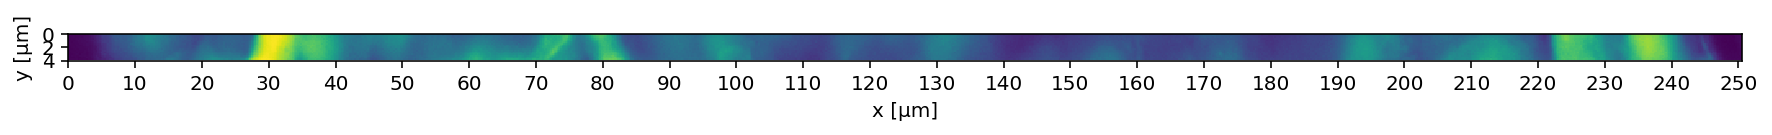

In [18]:
%%time
plt.figure(figsize=(15,15))
plt.imshow(image.mean(axis=0).T,
           extent=(
               0,image.shape[1]*mdf.loc[idx,"X"],
               image.shape[2]*mdf.loc[idx,"Y"],0
           ))
plt.xlabel("x [%s]"%mdf.loc[idx,"[X]"])
plt.ylabel("y [%s]"%mdf.loc[idx,"[Y]"])
plt.xticks(np.arange(0,image.shape[1]*mdf.loc[idx,"X"],10));
plt.yticks(np.arange(0,np.ceil(image.shape[2]*mdf.loc[idx,"Y"])+1e-10,2));
""

In [19]:
allProfile = image.mean(axis=(1,2))

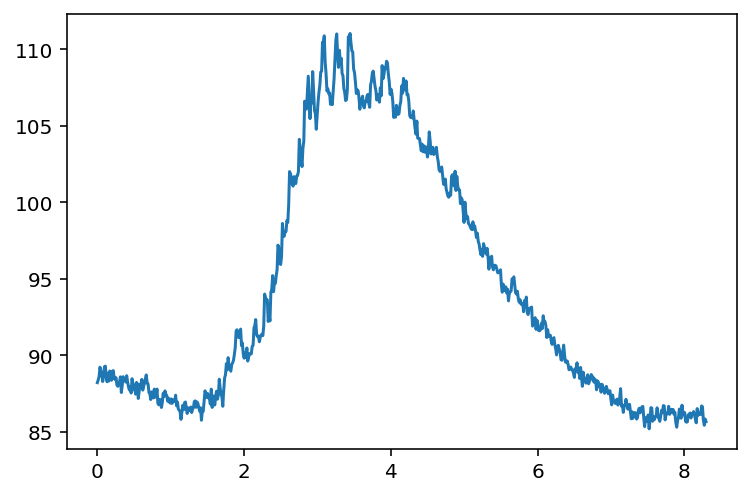

In [20]:
plt.plot(times,allProfile)

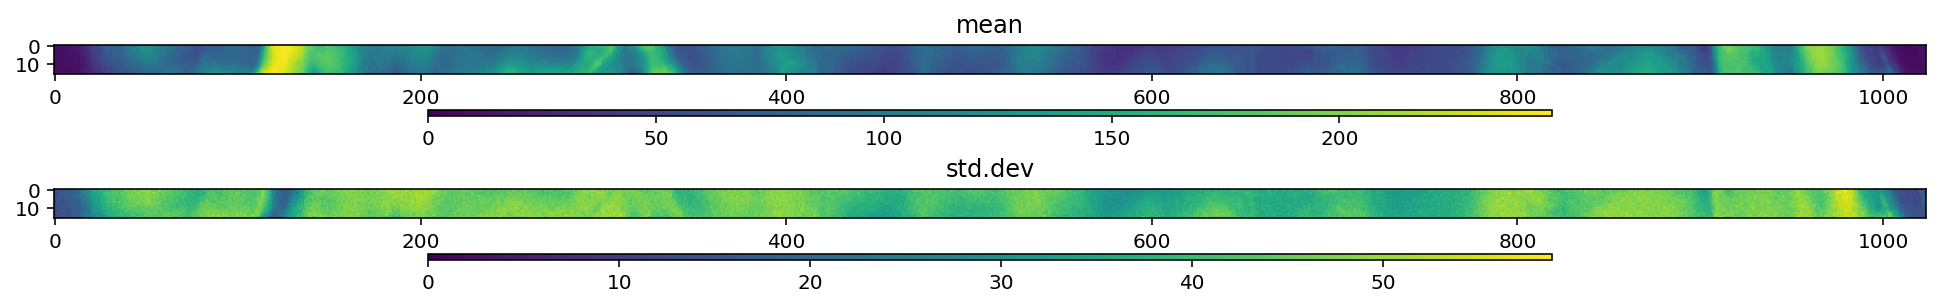

In [21]:
showAside = False
fig = plt.figure(figsize=(13,2))
if showAside:
    axs  = [fig.add_axes([ 0 ,0,.4 ,1]),fig.add_axes([.5 ,0,.4 ,1]),]
    caxs = [fig.add_axes([.41,0,.02,1]),fig.add_axes([.91,0,.02,1]),]
else:
    axs  = [fig.add_axes([  0,.07,1 ,.45]),fig.add_axes([ 0 ,.57, 1,.45]),]
    caxs = [fig.add_axes([0.2,.10,.6,.02]),fig.add_axes([0.2,.60,.6,.02]),]

for X,ax,cax,name in zip([image.std(axis=0),image.mean(axis=0)],axs,caxs,["std.dev","mean"]):
    im_ = ax.imshow(X.T, vmin=0)
    plt.colorbar(im_, cax=cax,orientation= "vertical" if showAside else "horizontal")
    ax.set_title(name)

In [166]:
def plotTimeProfileForROI(pxShow,pxWin,
                          timeWindow=None,
                          timeAverageWindow=1):
#     pxWin  = 6 # 0 corresponds to single pixel, 1 corresponds to 3 px, 2 -> 5, 3 -> 7 etc
#     pxShow = (180,7)
    if timeWindow is None:
        timeWindow = (times.min(), times.max())
    xx = max(pxShow[0]-pxWin,0), min(pxShow[0]+pxWin+1,image.shape[1])
    yy = max(pxShow[1]-pxWin,0), min(pxShow[1]+pxWin+1,image.shape[2])
    twSlice = slice(*(np.where(times>=tl)[0][0] for tl in timeWindow))

    ii = (twSlice, slice(*xx), slice(*yy) )
    profile = image[ii].mean(axis=(1,2))
    times_ = times[twSlice]
    rebTime    = rebin(times_,timeAverageWindow,0)
    rebProfile = rebin(profile,timeAverageWindow,0)

    # setup figure layout
    figwidth,figheight = 12,3
    ar = dimensions["Y"]/dimensions["X"]*figwidth/figheight
    hspacing = [ar,.3/figwidth]
    hspacing += [1-sum(hspacing)]
    fig = plt.figure(figsize=(figwidth,figheight))
    dd = .2
    axs = []
    for i in range(0,len(hspacing),2):
        axs += [fig.add_axes([0,1-sum(hspacing[:i+1]),1,hspacing[i]], 
    #                          sharex=axs[-1] if len(axs) else None
                            )]

    # plot mean of the whole FOV as a reference and inside ROI
    ax = axs[0]
    ax.imshow(image.mean(axis=(0)).T)
    roi = Rectangle(
                (xx[0]-.5+dd/2,yy[0]-.5+dd/2),
                width=xx[1]-xx[0]-dd,
                height=yy[1]-yy[0]-dd,
                fill=False,
                edgecolor="C1"
            )
    ax.add_patch(roi)

    # plot time profile of the ROI and its first derivative (sometimes informative)

    ax = axs[1]
    c = ax.plot(times_,profile,"-",lw=.3,ms=2)[0].get_color()
    ax.plot(rebTime,rebProfile,c=c,lw=1,label="time profile for the roi")
    ax.set_xlim((timeWindow))

    offset = np.percentile(profile,5)-profile.std()
    c = ax.plot(times_[:-1],np.diff(profile)+offset,lw=.3)[0].get_color()
    ax.plot(rebTime[:-1],np.diff(rebProfile)+offset,c=c,lw=1,label="first derivative")
    ax.legend()
    ax.grid()
    return times_,profile

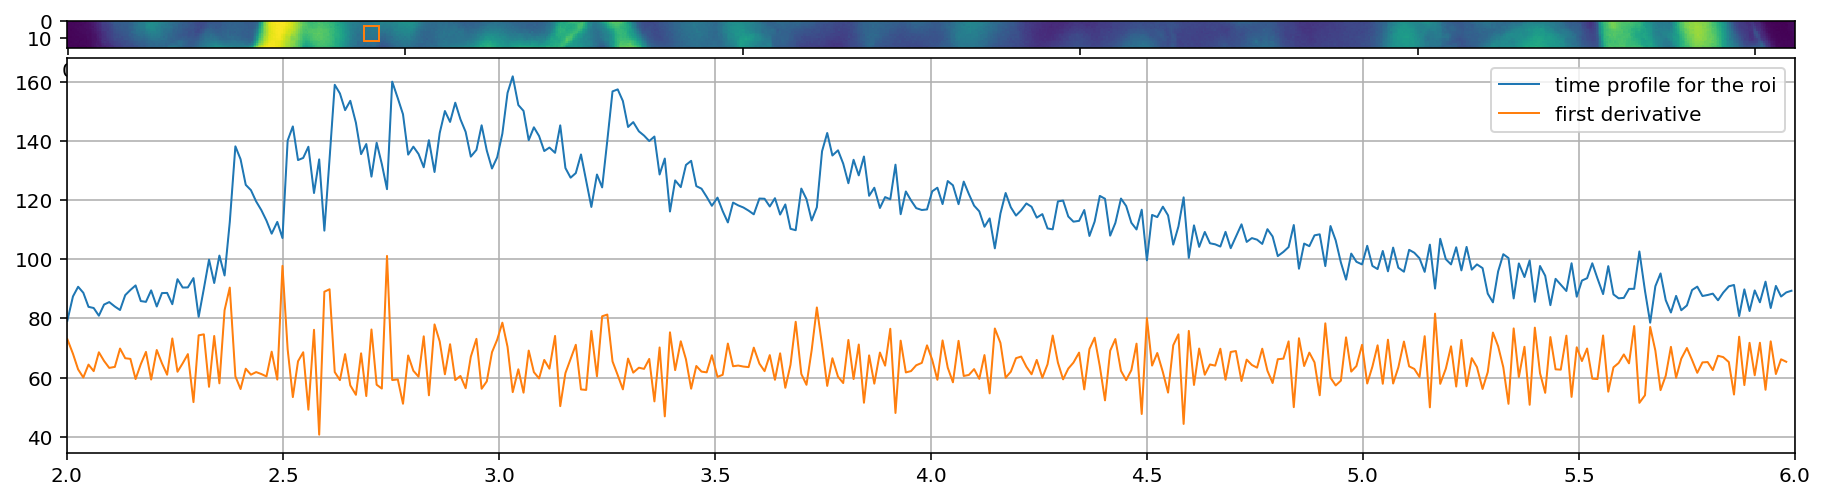

In [223]:
t,x = plotTimeProfileForROI((180,7),4,
                            timeAverageWindow=1,
                            timeWindow=(2,6)
                           )

accepted because the fve difference was large enough: 6.213470 --> 4.929071 (0.206712)
accepted because the fve difference was large enough: 4.929071 --> 2.859064 (0.419959)
accepted because the fve difference was large enough: 2.859064 --> 1.282413 (0.551457)
stopped because there was nothing else to find


/Users/srdjan/anaconda2/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


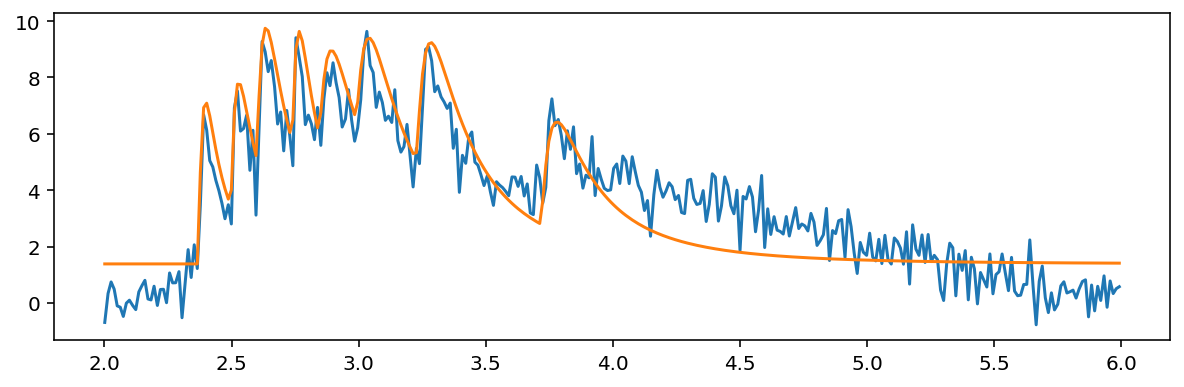

In [224]:
y = x-np.percentile(x,5)
y = y/(np.diff(y)).std()
plt.figure(figsize=(10,3))
ax = plt.subplot(111)
# Fit(t,y,ax=ax,nPeaks=10,verbose=False)
PS = manyFit(t,y,verbose=True,toll = .01)
ax.plot(t,y)
ax.plot(t,multiFun(t,PS))

I think the discrepancy accumulates because I fit simple logNorm which essentially neglects the plateau after the peak. Have a look at the incremental fitting of the same dataset:

0 0 42 (5.4263390972495955, -2.7755575615628914e-16, 2.3900012969970703, 0.07) 2.0010013580322266 2.4990005493164062
accepted since score0 = 329.4 and suggested score = 14.1
0 0 51 (7.490481099219546, -0.462400680068921, 2.5110015869140625, 0.07) 2.0010013580322266 2.608001708984375
accepted since score0 = 392.5 and suggested score = 24.7
0 0 62 (5.813741570775118, -0.5417271162410102, 2.6200008392333984, 0.07) 2.0010013580322266 2.7410011291503906
accepted since score0 = 436.7 and suggested score = 25.5
0 0 71 (3.7804122383138963, -0.5579181328524729, 2.753000259399414, 0.07) 2.0010013580322266 2.851001739501953
accepted since score0 = 407.4 and suggested score = 33.5
0 0 82 (5.12656124287856, -0.6175935641918112, 2.875, 0.07) 2.0010013580322266 2.9840011596679688
accepted since score0 = 434.2 and suggested score = 36.0
0 0 101 (5.025961870666473, -0.6245901530622784, 3.020000457763672, 0.07) 2.0010013580322266 3.214000701904297
accepted since score0 = 386.1 and suggested score = 44.9

/Users/srdjan/anaconda2/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


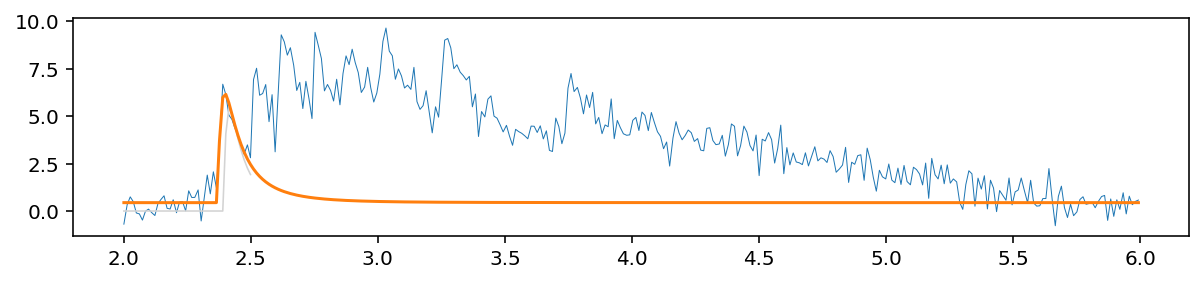

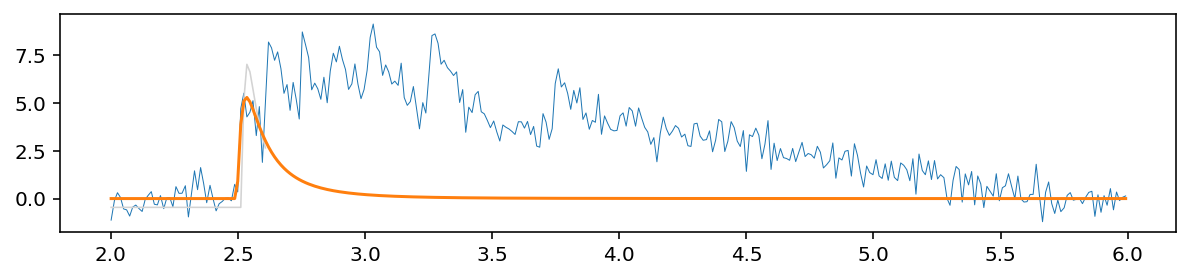

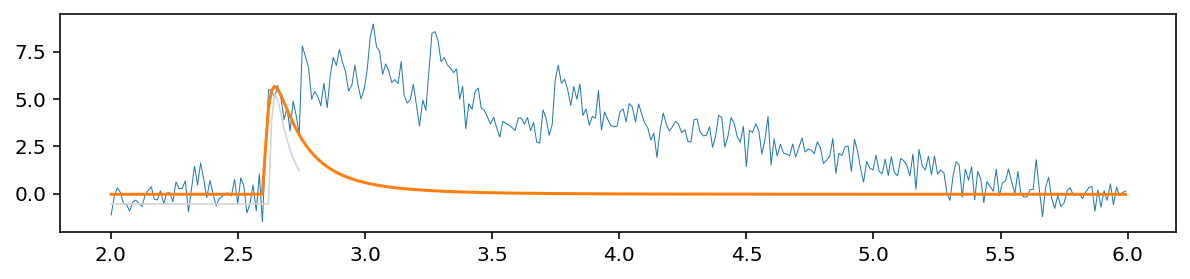

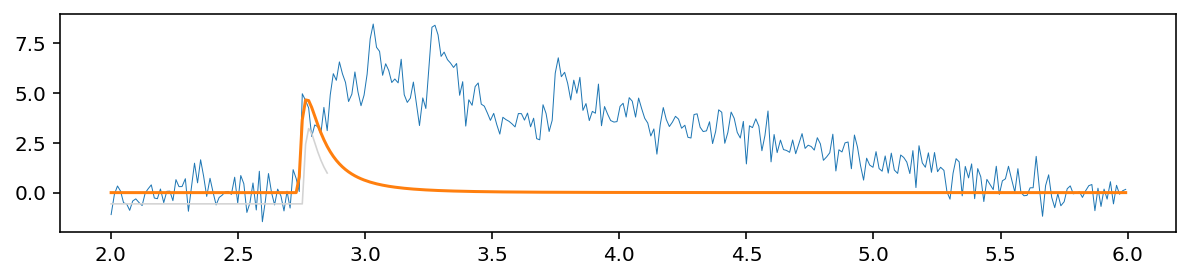

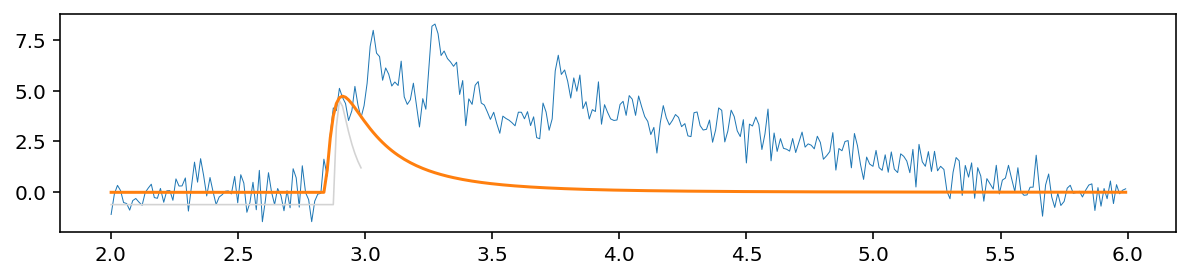

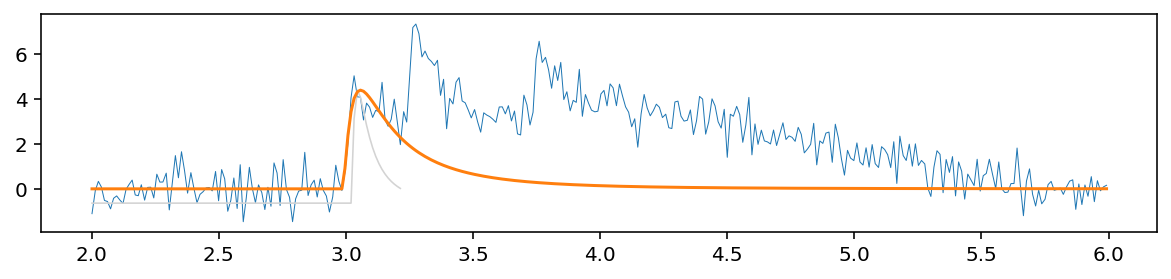

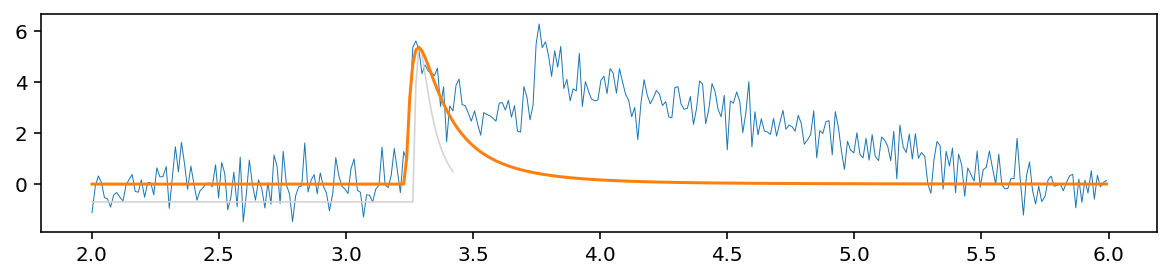

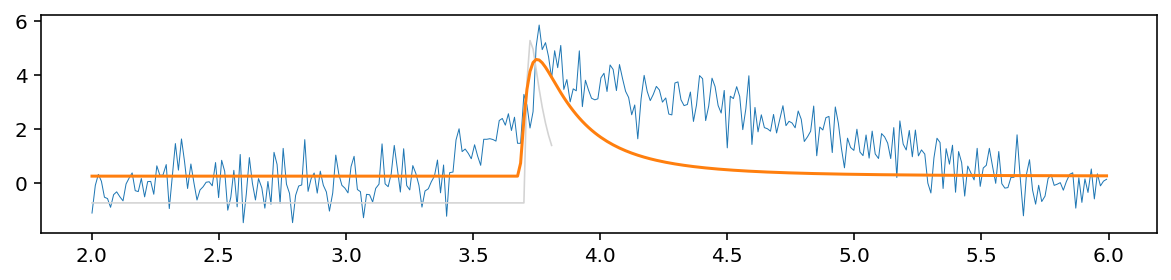

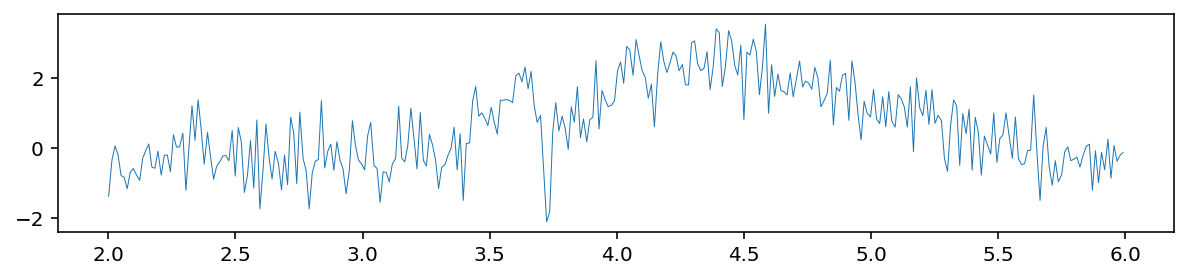

In [225]:
y = x-np.percentile(x,5)
y = y/(np.diff(y)).std()

PS = []
for i in range(10):
    if len(PS):
        y = y-multiFun(t,[PS[-1]])
    plt.figure(figsize=(10,2))
    ax = plt.subplot(111)
    ps = Fit(t,y,nPeaks=1,verbose=True,ax=ax)
    if len(ps)==0:
        break
    PS += ps


# Other Stuff

In [43]:
# collapse the y-dimension to obtain effectively a line scan
# LineT = np.mean(image,axis=2)

In [53]:
rebinWindows = (1,1,image.shape[-1])

In [54]:
reshapedImage = image.copy()
for j,n in enumerate(rebinWindows):
    reshapedImage = rebin(reshapedImage,n,axis=j)

In [55]:
reshapedImage.shape

(685, 1024, 1)

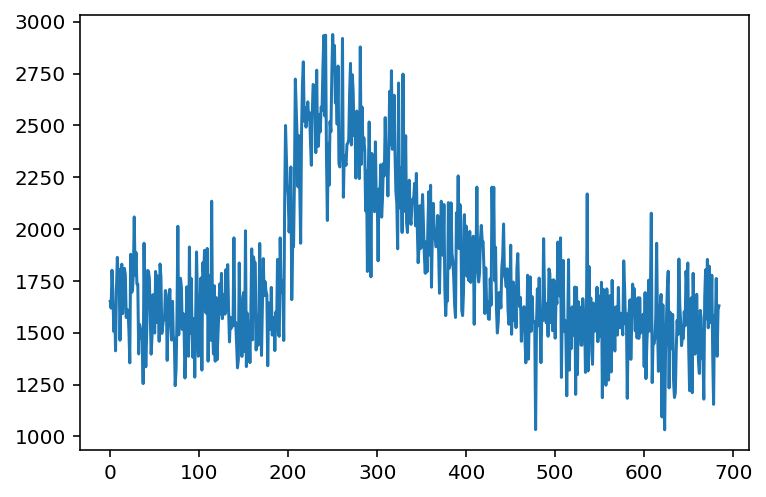

In [60]:
pxShow = (200,0)

plt.plot(reshapedImage[(slice(None),)+pxShow])

In [332]:
smoothLine = np.array([moving_average(line,avgWindow-1)[::avgWindow//2] for line in LineT[twIndices].T]).T
smoothAvgLine = smoothLine.reshape(len(smoothLine),LineT.shape[1]//pxAvg,pxAvg).mean(axis=-1)
offsets = np.percentile(smoothAvgLine,5,axis=0)
offsetM = np.array([offsets]*len(smoothAvgLine))
X = smoothAvgLine - offsetM

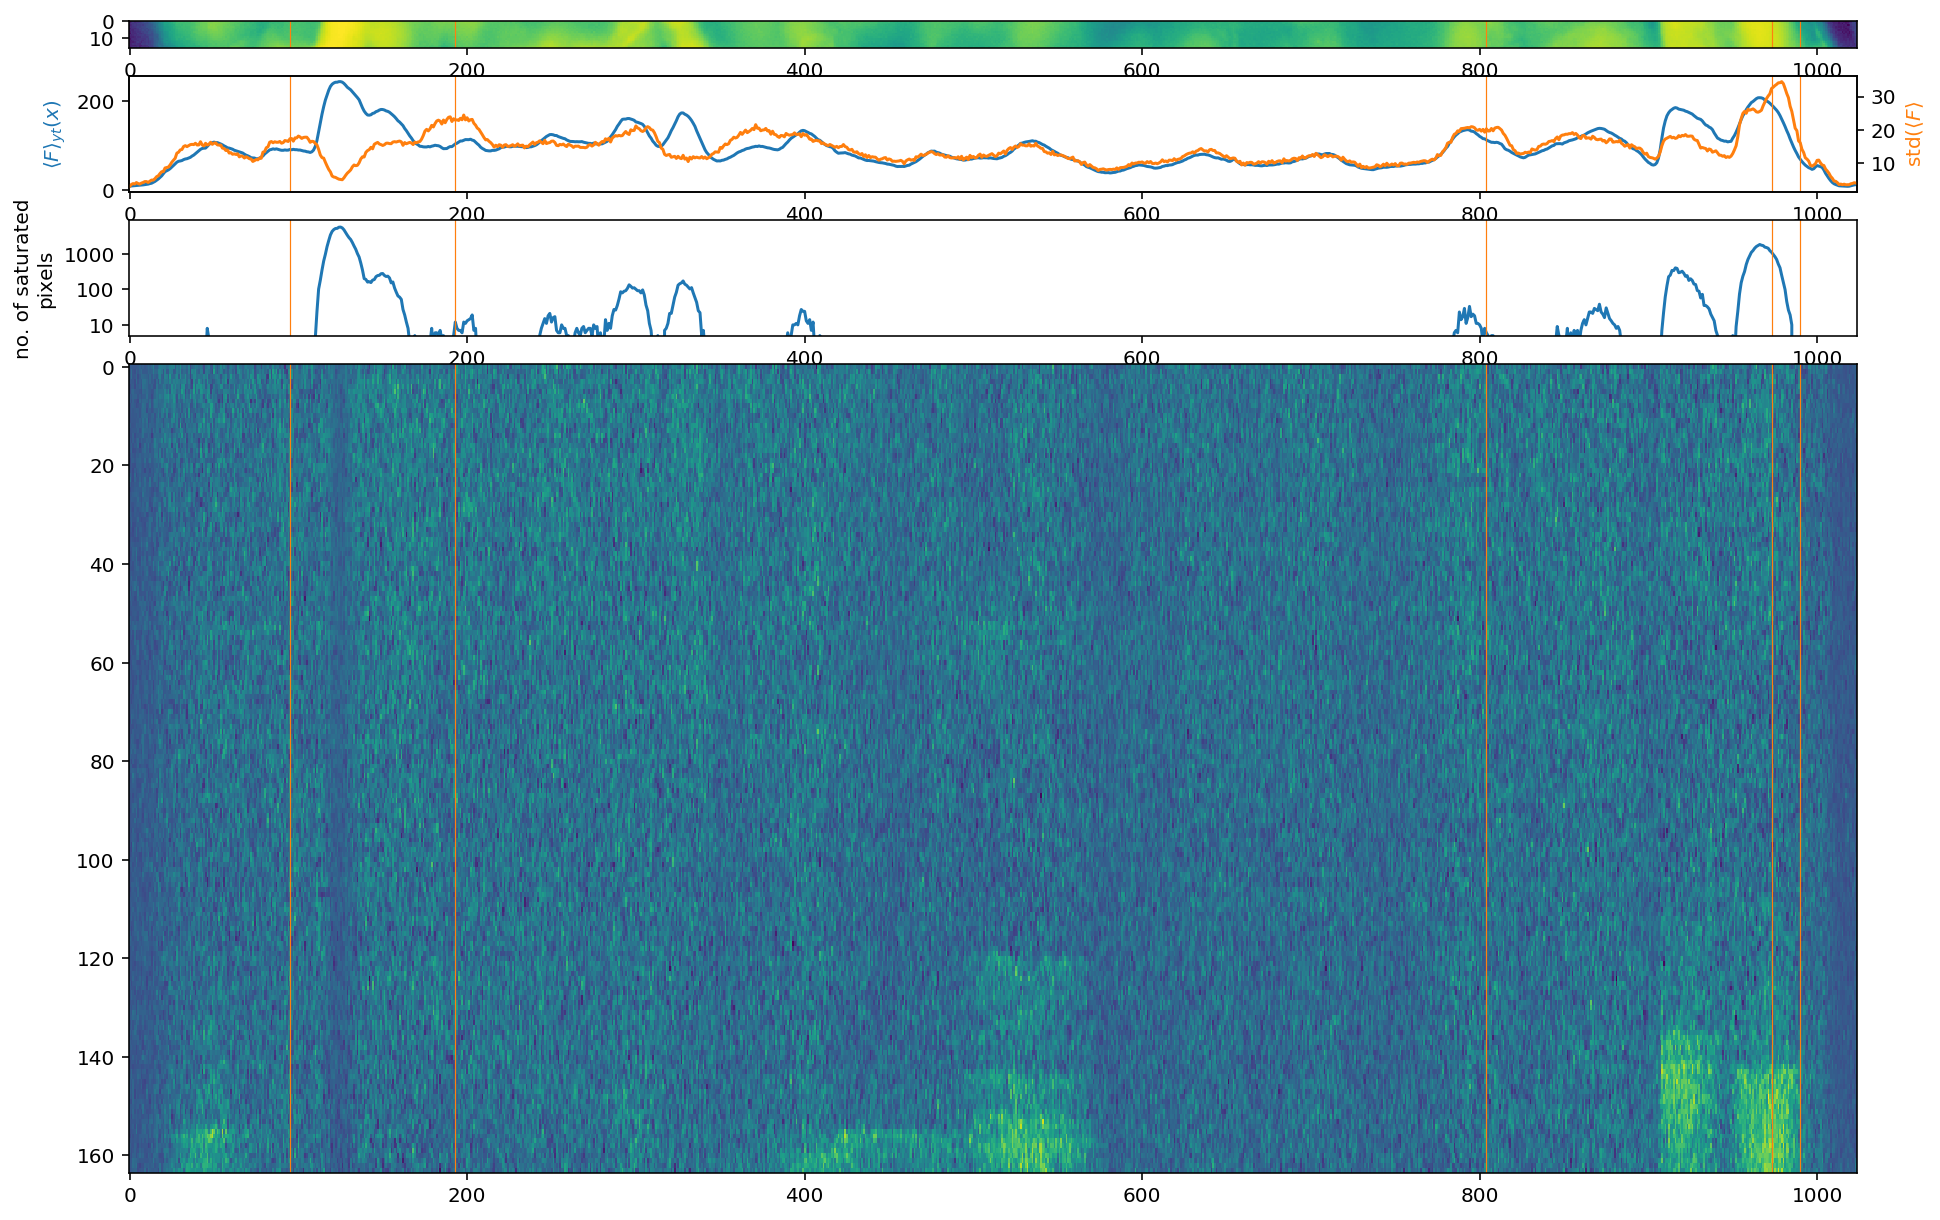

In [366]:
figwidth,figheight = 12,8
ar = dimensions["Y"]/dimensions["X"]*figwidth/figheight
hspacing = [ar,.3/figwidth,1.2/figwidth,.3/figwidth,1.2/figwidth,.3/figwidth]
hspacing += [1-sum(hspacing)]
fig = plt.figure(figsize=(figwidth,figheight))
axs = []
for i in range(0,len(hspacing),2):
    axs += [fig.add_axes([0,1-sum(hspacing[:i+1]),1,hspacing[i]], sharex=axs[-1] if len(axs) else None)]

# axs  = [fig.add_axes([0,(1-ar)*figwidth/figheight,1,ar*figwidth/figheight])]
# axs += [fig.add_axes([0,(1-ar)*(figwidth/figheight+1.5),1,(1-ar)*figwidth/(figheight+.3)],sharex=axs[0])]
# axs += [fig.add_axes([0,0,1,(1-ar)*figwidth/(figheight+.3)],sharex=axs[0])]

ax = axs[0]
ax.imshow(np.log10(1e-1+image.mean(axis=0).T))
ax.set_aspect("equal")

ax = axs[1]
ax.plot(image.mean(axis=(0,2)))
ax.set_ylabel(r"$\langle{F}\rangle{}_{yt}(x)$",color="C0")
axt = ax.twinx()
axt.plot([])
axt.plot(image.mean(axis=2).std(axis=0))
axt.set_ylabel(r"std$(\langle{F}\rangle{}}_{y})_t(x)$",color="C1")


ax = axs[2]
satpx = np.sum(image==image.max(),axis=(0,2))
ax.plot(satpx)
ax.set_ylabel("no. of saturated\npixels")
ax.set_yscale("log")
ax.set_ylim(5,)
ax.set_yticks(10**np.arange(1,int(np.log10(satpx.max()))+1))
ax.set_yticklabels(10**np.arange(1,int(np.log10(satpx.max()))+1))

ax = axs[-1]
ax.imshow(X,
#           extent=(0,X.shape[1],timeWindow[1],timeWindow[0]),
          cmap="viridis")

interesting = [95,193,804,973,990]
for ax in axs:
    for px in interesting:
        ax.axvline(px,lw=.6,color="C1")
# fig.tight_layout(w_pad=.1)
ax.set_aspect("auto")

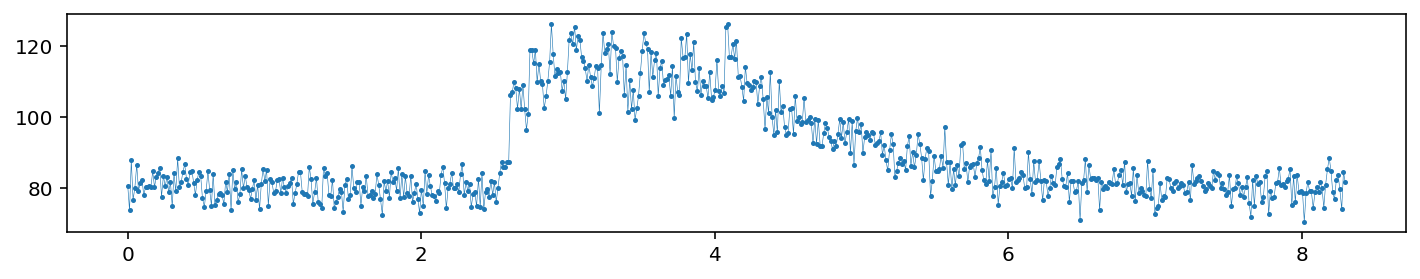

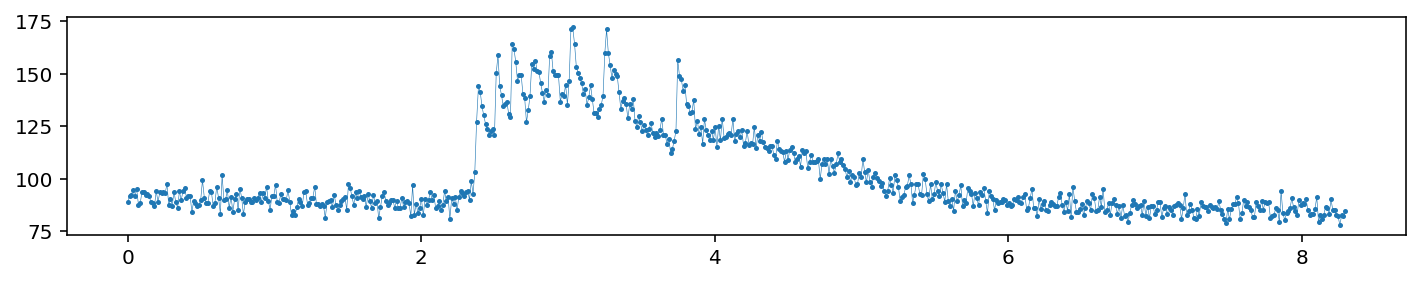

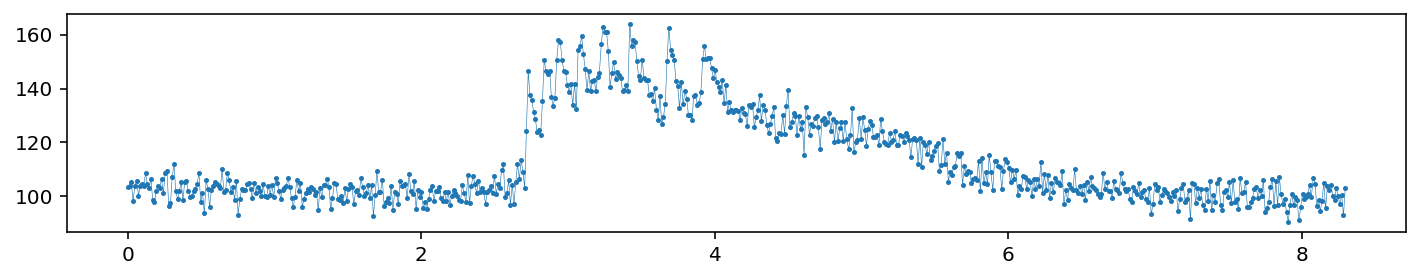

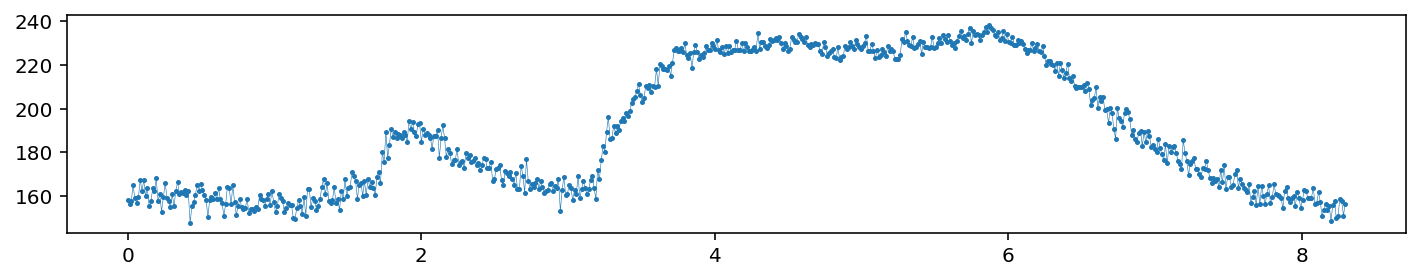

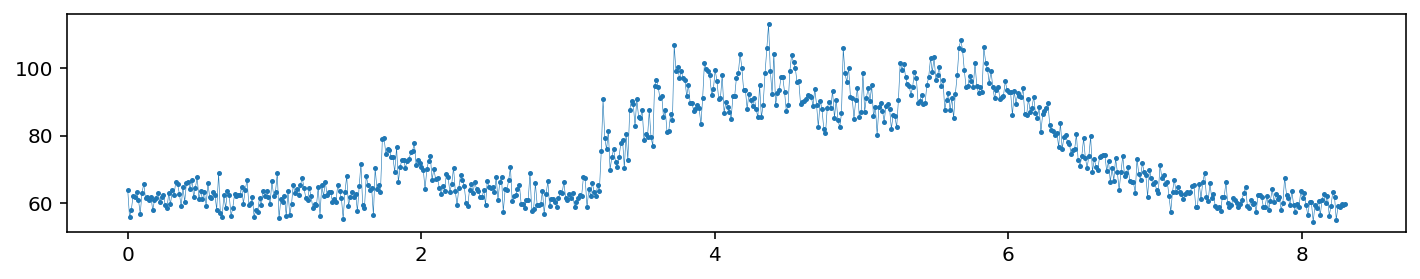

In [266]:
for iShow in interesting[:]:
    plt.figure(figsize=(12,2))
    ax = plt.subplot(111)
#     t,x = times, LineT[:,iShow]
#     ax.plot(t,x,lw=.3)
    t,x = times, LineT[:,iShow-5:iShow+5].mean(axis=1)
    ax.plot(t,x,".-",lw=.3,ms=3)
#     ax.set_xlim(2,4)

# Time profiles again

In [1215]:
t0 = 0
avgWindow = 30
pxAvg = 1

timeWindow = np.array([t0,t0+1])
twIndices = slice(*(np.where(time>=tl)[0][0] for tl in timeWindow))
smoothTime = moving_average(time[twIndices],avgWindow-1)[::avgWindow//2]
smoothLine = np.array([moving_average(line,avgWindow-1)[::avgWindow//2] for line in LineT[twIndices].T]).T
smoothAvgLine = smoothLine.reshape(len(smoothLine),LineT.shape[1]//pxAvg,pxAvg).mean(axis=-1)
offsets = np.percentile(smoothAvgLine,5,axis=0)
offsetM = np.array([offsets]*len(smoothAvgLine))
smoothAvgLine = smoothAvgLine - offsetM

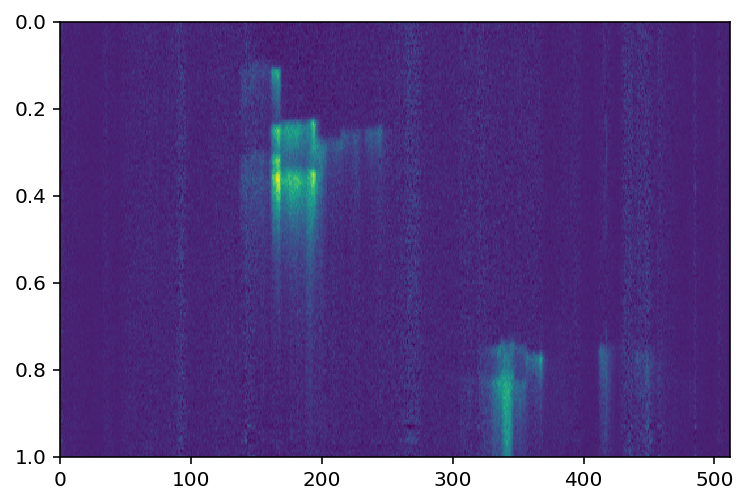

In [1216]:
plt.imshow(smoothAvgLine,extent=(0,LineT.shape[1],timeWindow[1],timeWindow[0]))
plt.gca().set_aspect("auto")

In [1217]:
# %%time
# for px in range(165,167):
# # for px in list(range(165,167))+list(range(140,145)):
#     plt.figure(figsize=(12,2))
#     ax = plt.subplot(111)
#     t,y = smoothTime,smoothAvgLine.T[px]
#     ps = fit(t,y,ax = ax)
#     plt.show()

In [1211]:
%%time
Spikes = []
for px in range(LineT.shape[1]):
    t,y = smoothTime,smoothAvgLine.T[px]
    ps = fit(t,y,ax = False)
    Spikes += [(px,)+tuple(p) for p in ps]

-47.757411521304675
-129.48080012021637
-369.994018463246
-315.5352178008761
-153.57061148476623
-1673.9633253809043
-3310.2662843289636
-2189.4910975554612
-1659.4914280951743
2980.4010096675484
-458.0243358872285
-267.03051785335083
-268.3049779873181
-957.6569345479711
-775.044513192559
-1735.521964523381
497.9213464171298
-1499.6899420148075
-2244.1287278750024
-303.88569237331103
-7466.775738213745
-1193.3744121717264
3040.412355515773
-624.3507348274779
-3319.5588835023154


/Users/srdjan/anaconda2/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


-1644.1645369890794
-1789.7235026689414
-1393.6189950595544
2888.4364950890395
-1093.838440998119
872.7489065299633
-1234.1399658588944
-1550.409157848544
-2825.052448772014
-2324.531863781838
-2325.6433996374344
14794.367227372495
-16819.107441064094
37833.418300491656
-55006.943186854216
-19980.889808297645
59756.58099878946
-76500.91677275933
-33574.47053218904
62454.25841092237
-96456.64032320004
-31448.69351278658
57982.38605305285
-120560.33989623704
-49224.38457167013
92968.56403723906
-142725.7902670991
-58231.69915044123
88923.32107927586
-118091.07500414399
-82017.07367847723
58616.515844725625
-86507.63938331518
-38504.45522170587
-51447.0411319535
-37727.27729270367
-41707.29509473074
-43335.22039123608
-48894.90359650927
-39879.34584635838
-59230.55470544397
-37290.373345246044
-64726.17868681359
-44385.36092069779
-55467.733899434315
-56979.71450378525
-81184.6034212759
-48662.26120736674
-17576.11725056413
-99767.50453285001
-33092.75382425732
-83256.1770495516
-54562.35

In [1218]:
Spikes = pd.DataFrame(Spikes,columns=["px","Amplitude","offset","time","scale","s"])

In [1222]:
clrs = plt.cm.hot(Spikes.Amplitude/Spikes.Amplitude.max())

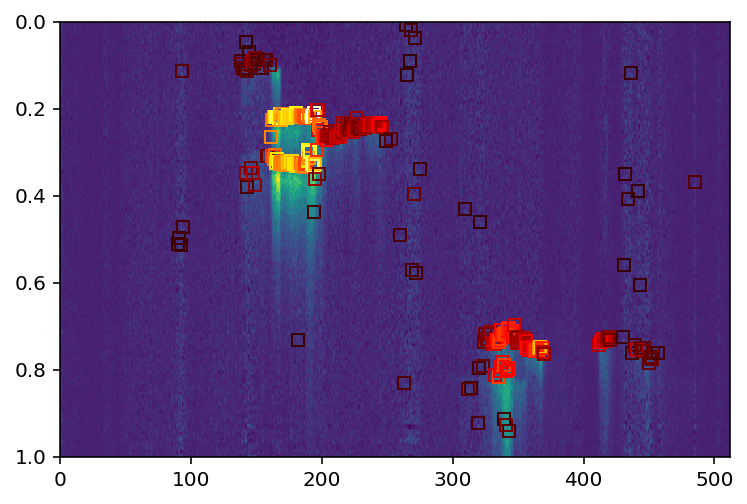

In [1223]:
plt.imshow(smoothAvgLine,extent=(0,LineT.shape[1],timeWindow[1],timeWindow[0]))
plt.gca().set_aspect("auto")
for i, row in Spikes.iterrows():
    plt.plot(row.px,row.time,"s",c=clrs[i], mfc="none")

In [1243]:
Binarized = np.ones_like(smoothAvgLine)*np.nan

In [1244]:
for _,row in Spikes.iterrows():
    it = np.argmin(np.abs(smoothTime-row.time))
    px = int(row.px)
    Binarized[it,px] = row.Amplitude

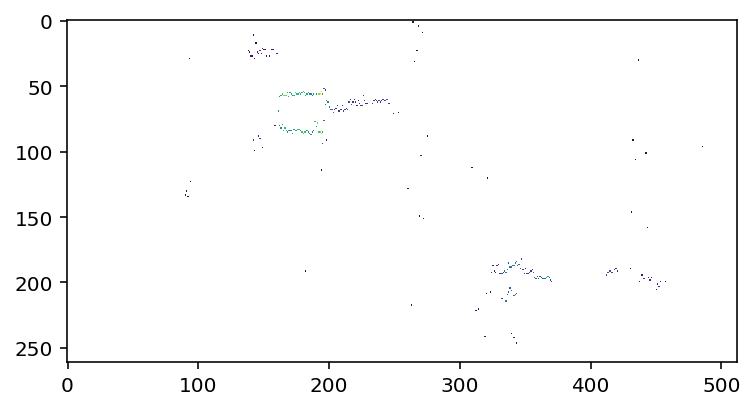

In [1245]:
plt.imshow(Binarized)

## See distributions and filter

In [45]:
Nsample = int(1e7)
pixelSample = np.random.choice(image.flatten(), Nsample)

In [46]:
x,y = np.array(tally(pixelSample)).T
xth =  80
yth = 1e5

<BarContainer object of 53 artists>

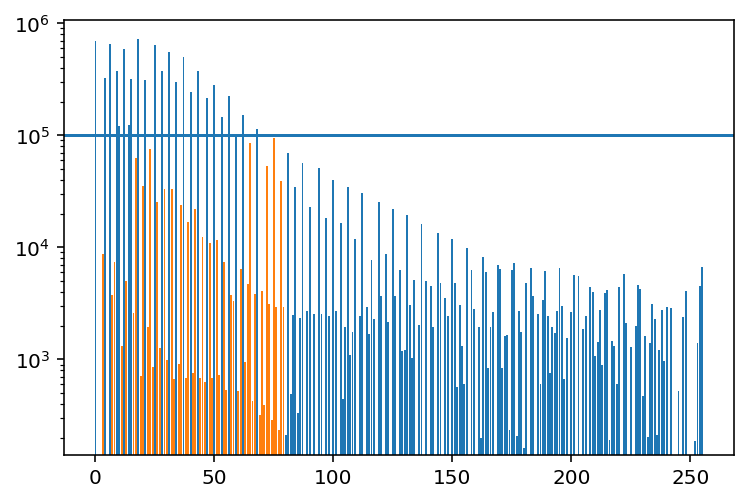

In [47]:
plt.bar(x,y)
plt.yscale("log")
plt.axhline(yth)
take = x[y<yth]
take = take[take<xth]

tmp = pixelSample
tmp = tmp[np.isin(tmp,take)]
x_noise,y_noise = np.array(tally(tmp)).T
plt.bar(x_noise,y_noise)

In [22]:
showTransposed = True

CPU times: user 606 ms, sys: 7.65 ms, total: 614 ms
Wall time: 612 ms


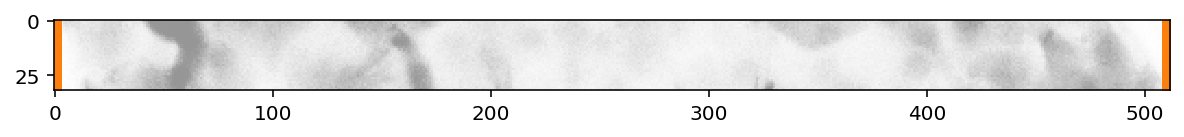

In [23]:
%%time
plt.figure(figsize=(10,4))
ims = image[::1000]
X = np.mean(ims,axis=0)
if not showTransposed: X = X.T
plt.imshow(X, cmap="Greys",vmax=2*256)
for t,x,y in zip(*np.where(np.isin(ims[:],take))):
    if showTransposed:
        x,y = y,x
    plt.plot(x,y,"C1s",
             alpha = .2
            )
#     if t>0:
#         break

In [24]:
Nsample = int(1e7)
pixelSampleRed = np.random.choice(image.T[1:-1].flatten(), Nsample)
xRed,yRed = np.array(tally(pixelSampleRed)).T

In [25]:
tmp = xRed[yRed>yth]
tmp = tmp[tmp<xth]
meanDiff = np.diff(tmp).mean()

del tmp

In [26]:
meanDiff

12.666666666666666

In [27]:
collectBulk = [xRed[0]]
for el in xRed[1:-1]:
    if np.abs(el-collectBulk[-1]-meanDiff)<1.5:
        collectBulk += [el]

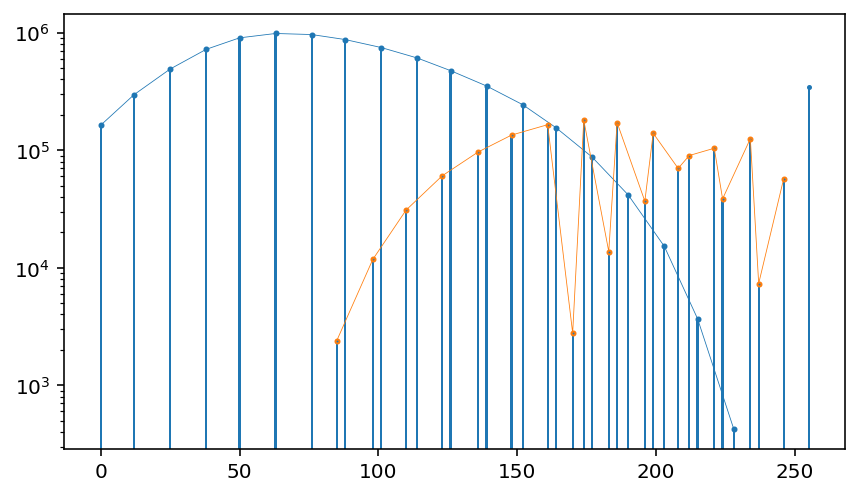

In [28]:
plt.figure(figsize=(7,4))
plt.bar(xRed,yRed,color="C0")
plt.plot(xRed,yRed,".-", ms=3, lw=0,color="C0")
plt.yscale("log")

fltr = np.isin(xRed, collectBulk)
for xf,yf in [
    (xRed[ fltr], yRed[ fltr]),
    (xRed[~fltr], yRed[~fltr]),
]:
    ff = xf!=xRed.max()
    xf = xf[ff]
    yf = yf[ff]
    plt.plot(xf,yf,".-", ms=4, lw=.4, mfc="none")

In [29]:
scale = np.diff(xRed[fltr]).mean()

In [30]:
np.diff(xf)

array([13, 12, 13, 13, 12, 13,  9,  4,  9,  3, 10,  3,  9,  4,  9,  3, 10,
        3,  9])

CPU times: user 807 ms, sys: 14.9 ms, total: 822 ms
Wall time: 820 ms


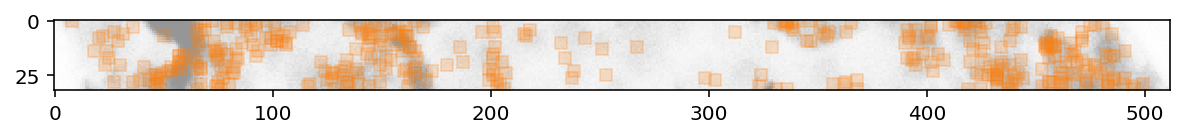

In [31]:
%%time
plt.figure(figsize=(10,4))
ims = image[::1000]
X = np.mean(ims,axis=0)
if not showTransposed: X = X.T
plt.imshow(X, cmap="Greys",vmax=2*256)
for t,x,y in list(zip(*np.where(np.isin(ims[:],xf))))[::100]:
    if showTransposed:
        x,y = y,x
    plt.plot(x,y,"C1s",
             alpha = .2
            )
#     if t>0:
#         break

In [32]:
# ## See features

# pd.options.display.max_rows = 100

# tmp = OrderedDict([(k,v) for k,v in constFeatures.items() if
#                                 "Filter" not in k and
#                                 "Channel" not in k and
#                                 "csLutName" not in k
#                                ])
# tmp.update(features.loc[Name])
# tmp = OrderedDict([(k.replace("|"," | "),v) for k,v in tmp.items()])
# tmp = pd.DataFrame(tmp, index=[0]).T
# print (len(tmp))
# tmp

In [33]:
# features[[c for c in features.columns if "nDelayTime" in c]]

# Choose ROI(s) and try analysis

In [34]:
TotalTime = features["DimensionDescription|Length"].loc[Name]

In [35]:
TotalTime

151.905

In [36]:
Frequency = dimensions["T"]/TotalTime

In [37]:
Frequency,Frequency*12

(82.44626642073938, 989.3551970488725)

In [38]:
timeStd = np.std(image, axis=0)

In [39]:
image.shape

(12524, 32, 512)

In [40]:
if Name == "Series051":
    RFs = [    
        (np.arange(dimensions["X"]),
         np.arange(dimensions["Y"])),
        (np.arange(110,150),
         np.arange( 18, 31)),
        (np.arange(330,370),
         np.arange(  1, 18)),    
        (np.arange(390,410),
         np.arange(  1, 30)),    
        (np.arange(420,450),
         np.arange( 18, 31)),    
    ]
    

if Name == "Series052":
    RFs = [    
        (np.arange(dimensions["X"]),
         np.arange(dimensions["Y"])),
    ]
    RFs += [
        (np.arange(xx,xx+80),
         np.arange(dimensions["Y"])) for xx in [30,140,270,360]]    

RFs = OrderedDict(zip(range(len(RFs)),RFs))

In [41]:
list(map(lambda xi: len(xi[0]),RFs.values()))

[512, 40, 40, 20, 30]

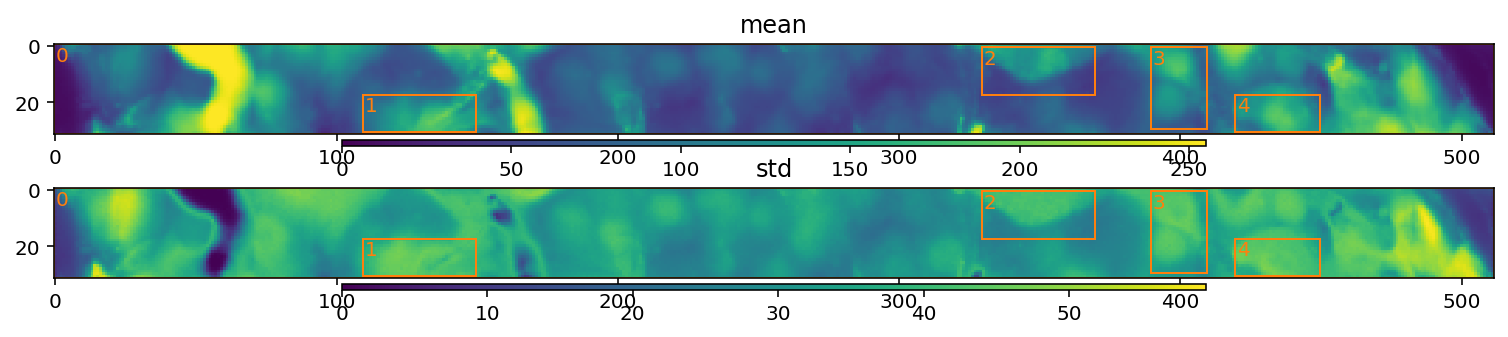

In [42]:
fig = plt.figure(figsize=(10,2))
if showTransposed:
    axs  = [fig.add_axes([  0,.07,1 ,.45]),fig.add_axes([ 0 ,.57, 1,.45]),]
    caxs = [fig.add_axes([0.2,.10,.6,.02]),fig.add_axes([0.2,.60,.6,.02]),]
else:
    axs  = [fig.add_axes([ 0 ,0,.4 ,1]),fig.add_axes([.5 ,0,.4 ,1]),]
    caxs = [fig.add_axes([.41,0,.02,1]),fig.add_axes([.91,0,.02,1]),]


for X,ax,cax,name in zip([timeStd,np.mean(image,axis=0)],axs,caxs,["std","mean"]):
    if not showTransposed:X = X.T
    im_ = ax.imshow(X, vmin=0)
    plt.colorbar(im_, cax=cax,orientation="horizontal")
    ax.set_title(name)
    ir = 0
    for rfname in RFs:
        regionFilter = RFs[rfname]
        roi = Rectangle(
            (regionFilter[0].min()-.5,regionFilter[1].min()-.5),
            width=len(regionFilter[0]),
            height=len(regionFilter[1]),
            fill=False,
            edgecolor="C1"
        )
        ax.add_patch(roi)
        ax.text(regionFilter[0].min(),regionFilter[1].min(),rfname,color="C1",va="top")
        ir+=1


In [43]:
time = np.linspace(0,TotalTime,dimensions["T"])

In [44]:
AllProfiles = OrderedDict()

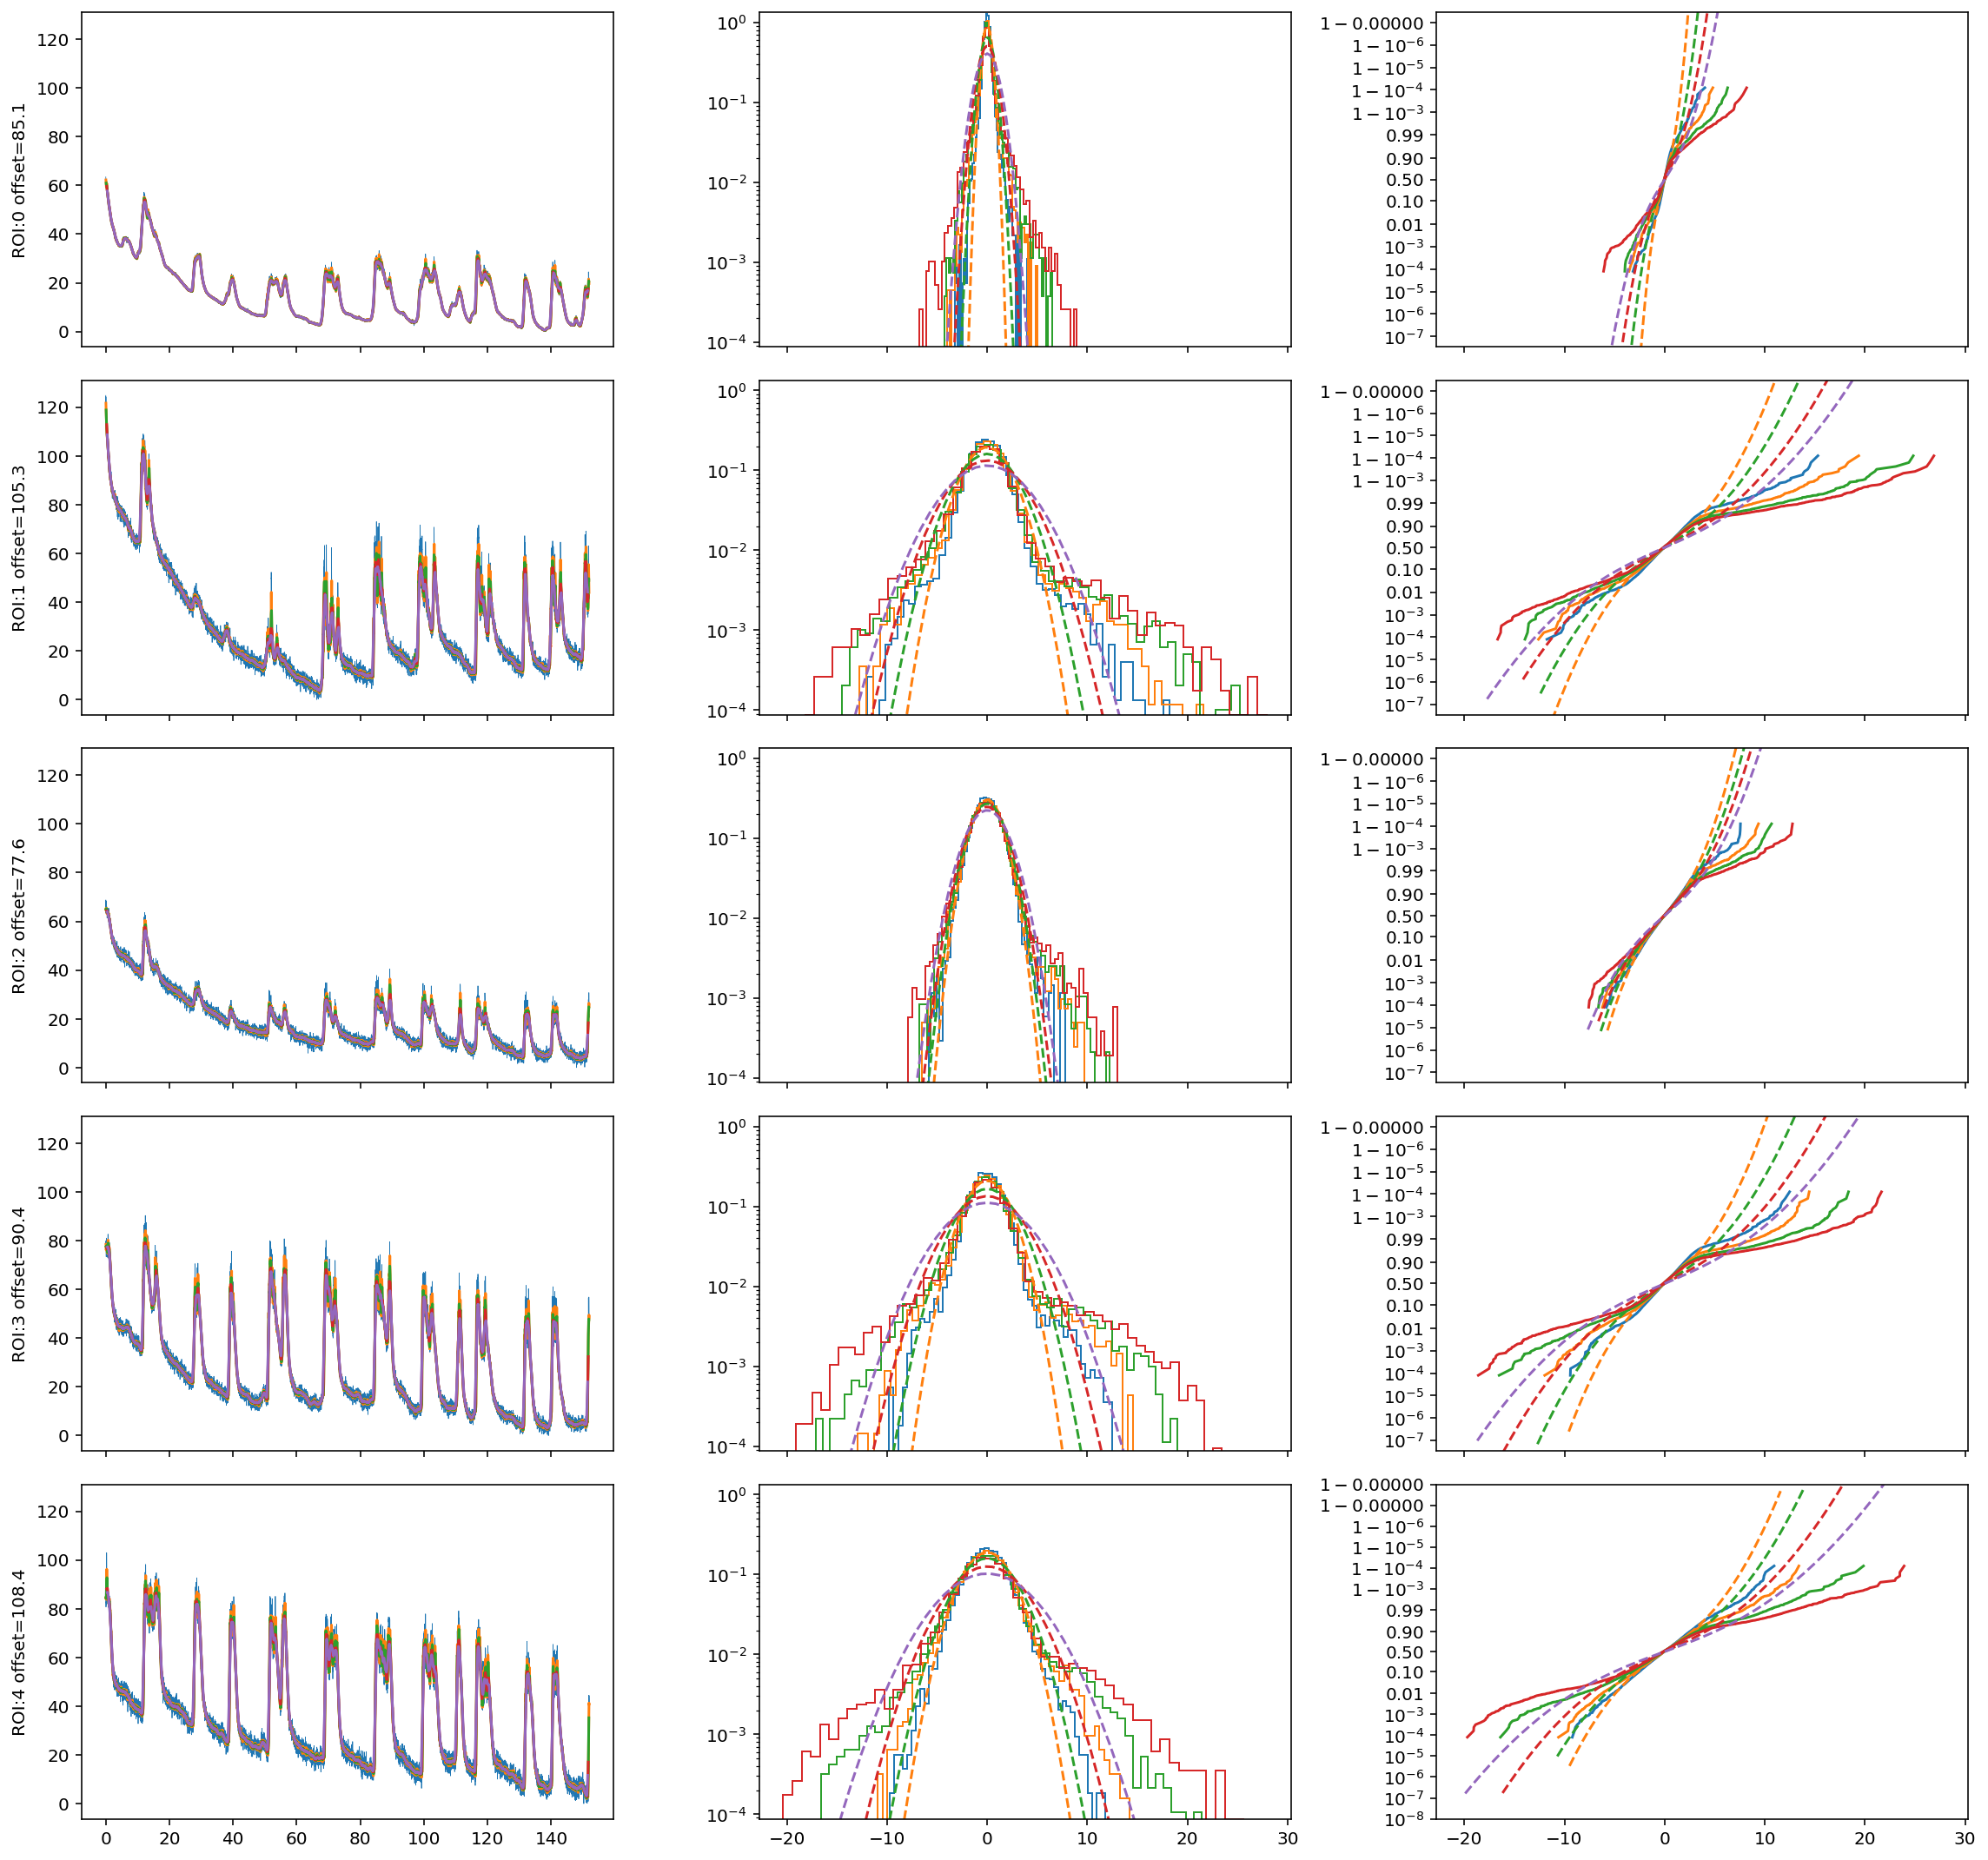

In [45]:
# showRFs = {0:RFs[0]}
showRFs = RFs
fig, Axs = plt.subplots(len(showRFs),3,figsize=(16,3*len(showRFs)), sharex="col", sharey="col")
if len(Axs.shape)==1:
    Axs=Axs.reshape(1,-1)

for ir,rfname in enumerate(showRFs):
    regionFilter = RFs[rfname]
    axs = Axs[ir]
    timeProfile = np.mean(image.T[np.ix_(*regionFilter)].T, axis=(1,2))
    offset = timeProfile.min()
    axs[0].plot(time,timeProfile-offset,lw=.4)
    profileAverages = OrderedDict([("raw",timeProfile)])
    for dtAvg in [10,20,50,80]:
        dtAvg -= 1
        timeProfileAvg = moving_average(timeProfile,dtAvg)
        timeAvg = moving_average(time, dtAvg)
        rest = timeProfile[dtAvg//2:-(dtAvg//2)]-timeProfileAvg
        profileAverages[dtAvg+1] = pd.DataFrame(OrderedDict([
            ("time", timeAvg),
            ("smooth", timeProfileAvg),
            ("rest", rest),
        ]))
        c = axs[0].plot(timeAvg,timeProfileAvg-offset,
#                         label="offset=%.1f"%timeProfileAvg.mean()
                       )[0].get_color()
        yb,bbs,_ = axs[1].hist(rest,50,histtype="step",density=True)
        xb = (bbs[:-1]+bbs[1:])/2
        restStd = rest.std()
        axs[1].plot(xb,dst.norm.pdf(xb,scale=restStd),c=c,ls="--")
        x = rest.copy()
        axs[1].set_ylim(yb[yb>0].min(),)
        axs[2].plot(sorted(x),np.linspace(0,1,len(x)))
        axs[2].plot(xb,dst.norm.cdf(xb,scale=restStd),c=c,ls="--")
#     axs[0].legend()
    axs[0].set_ylabel("ROI:%s offset=%.1f"%(repr(rfname),offset))
    axs[1].set_yscale("log")
    axs[2].set_yscale("logit")
    axs[2].set_yticks(axs[2].get_yticks())
    yx = axs[2].yaxis
    l = yx.get_minor_locator()
    l.minor = False
#     break
    AllProfiles[rfname] = profileAverages
fig.tight_layout()

<IPython.core.display.Javascript object>


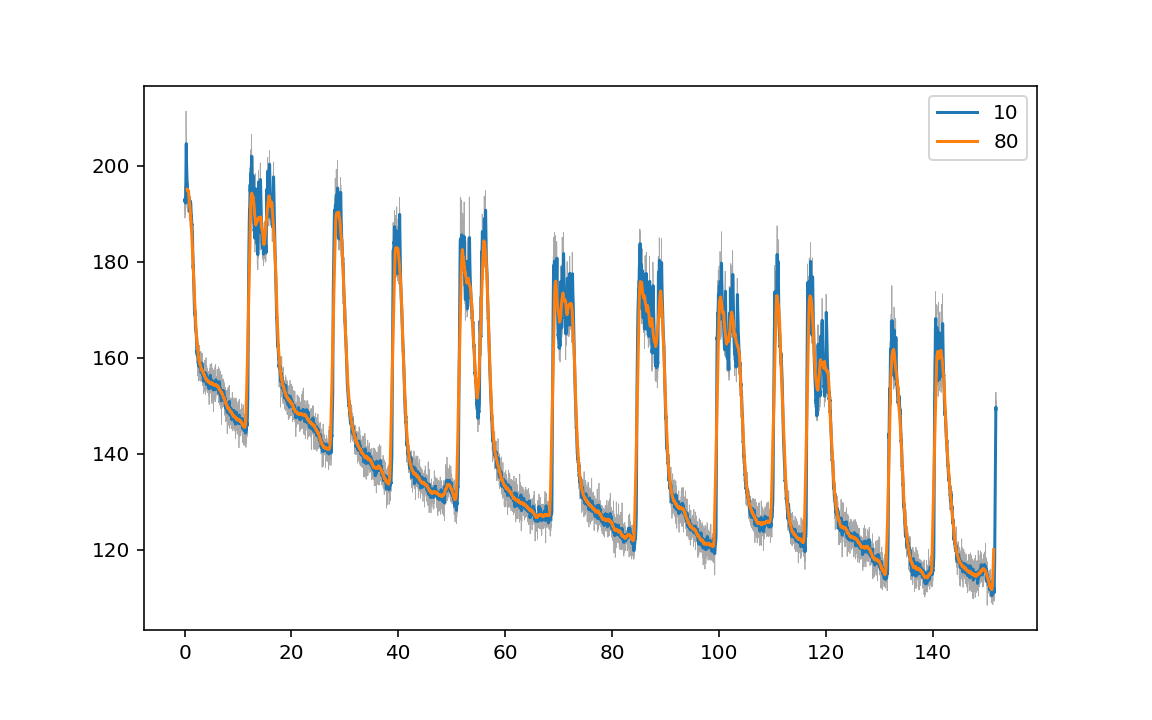

In [47]:
from importlib import reload
reload(plt)
%matplotlib notebook

rfname = 4

plt.figure(figsize=(8,5))

tmp = AllProfiles[rfname]
# for dtAvg in tmp:
for dtAvg in ["raw",10,80]:
    if dtAvg=="raw":
        plt.plot(time,tmp["raw"],color="darkgrey",lw=.4)
    else:
        t,x = tmp[dtAvg][["time","smooth"]].values.T
        plt.plot(t,x,label=dtAvg)
plt.legend()

In [144]:
filename, Name

('Experiment.lif', 'Series052')

## FFT

In [48]:
%matplotlib inline

In [71]:
TotalTime = 20.331 # from Sandra's screenshot

In [118]:
trace1 = tmp["raw"]
trace1 -= trace1.mean()
dt  = TotalTime/len(trace1)
FTs = np.fft.fft(trace1)
N   = len(trace1)
freqs = np.fft.fftfreq(N,dt)
FAs = np.abs(FTs)


In [119]:
PowerSpectrum = FAs**2/(1/dt)**2
print (np.sum(PowerSpectrum)*freqs[1])
print (np.sum(trace1**2)*dt)

71433.8045357824
71433.80453578239


In [120]:
def filterF(x,th=1,h=1):
    return 1/(th**2+x**2)**h

In [121]:

Nshow = N//2
l1 = plt.plot(freqs[:Nshow],PowerSpectrum[:Nshow], label='raw',
              color="darkgreen")
# smooth = 3
# l2 = plt.plot(freqs[smooth//2:Nshow-smooth//2],
#          moving_average(PowerSpectrum[:Nshow], smooth),
#               label='smoothed scale=%i'%smooth, color="indigo")

plt.ylabel('power spectrum')
plt.xlabel('frequency (Hz)')
# plt.xlim(2*freqs[1],10.**3.9)
plt.yscale('log')
plt.xscale('log')
plt.twinx()
# plt.xlim(2*freqs[1],10.**3.9)

xr = np.logspace(-2,2.1, 201)

l3 = plt.plot(xr,filterF(xr), label="filter", color="red", ls="--",lw=2)
plt.ylabel('single pole filter')

# lns = l1+l2+l3
# labs = [l.get_label() for l in lns]
# plt.legend(lns, labs, loc=3)
plt.legend()

In [100]:
from importlib import reload
reload(plt)

<IPython.core.display.Javascript object>


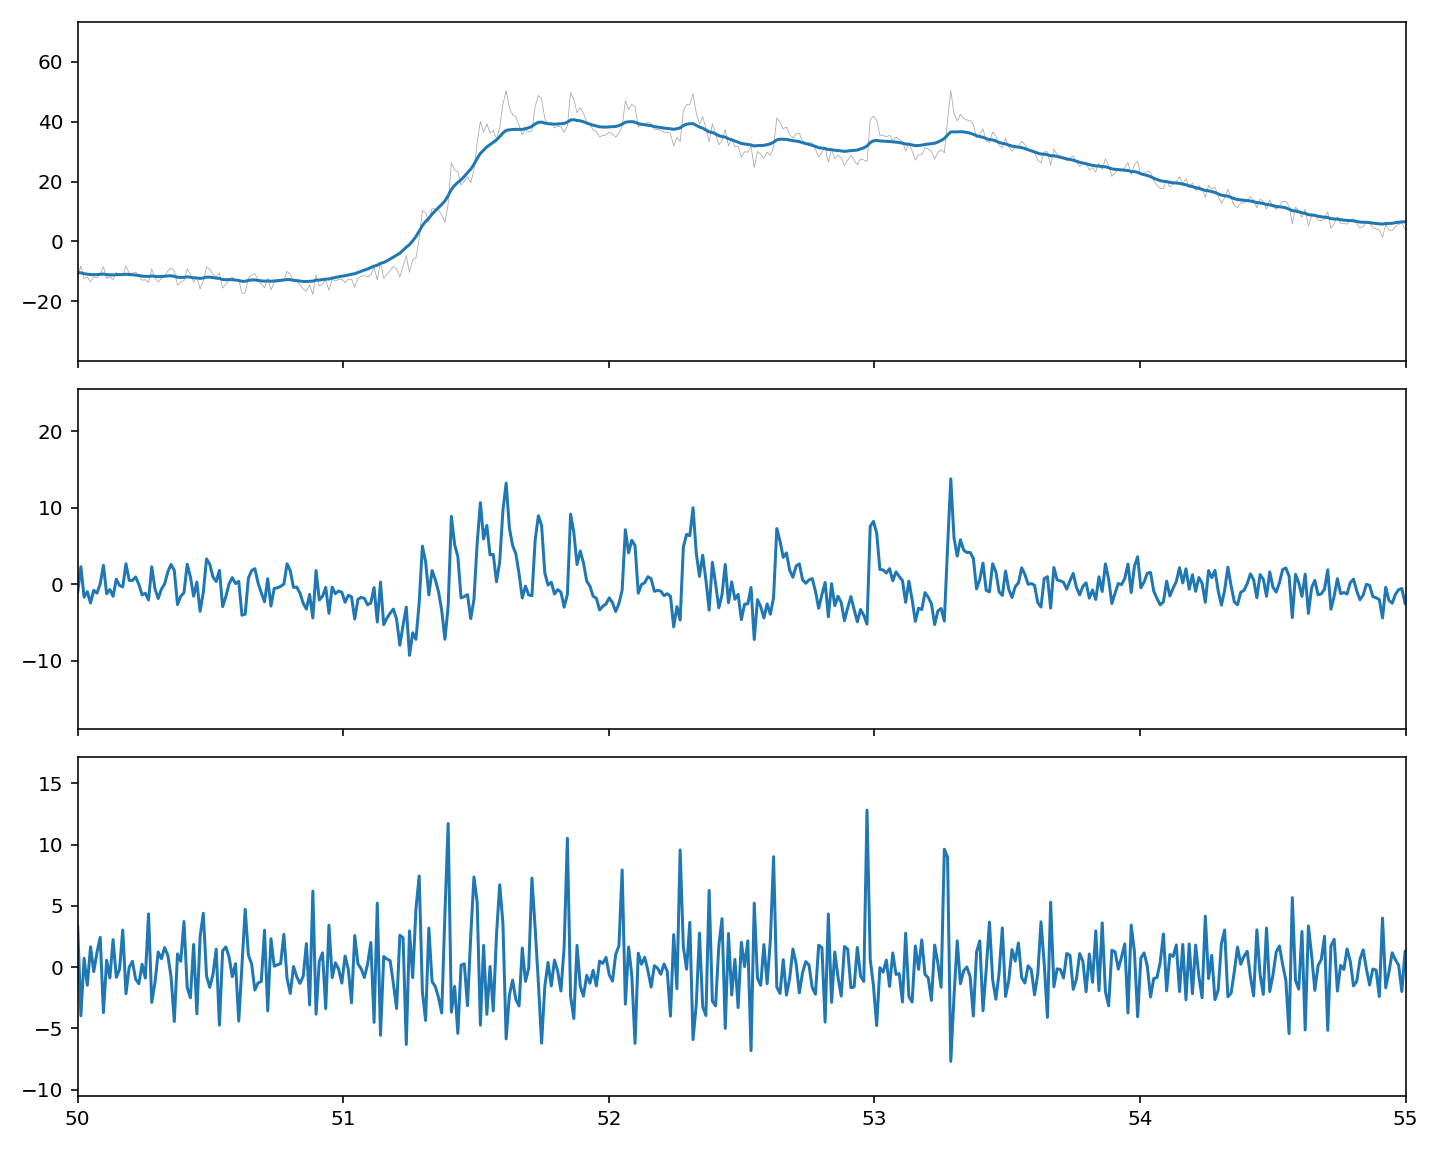

In [145]:
%matplotlib notebook
fig, axs = plt.subplots(3,1,figsize=(10,8), sharex=True)
axs[0].plot(time,trace1,color="darkgrey",lw=.4)

for th in [1]:
    filteredFT = FTs*filterF(freqs,th=th)**.5
    filteredTrace = np.real_if_close(np.fft.ifft(filteredFT))
    axs[0].plot(time,filteredTrace)
    axs[1].plot(time,trace1-filteredTrace)
#     axs[2].plot(time[:-1],np.diff(trace1))
    axs[2].plot(time[:-1],np.diff(trace1-filteredTrace))

axs[1].set_xlim(50,55)
fig.tight_layout()

<IPython.core.display.Javascript object>


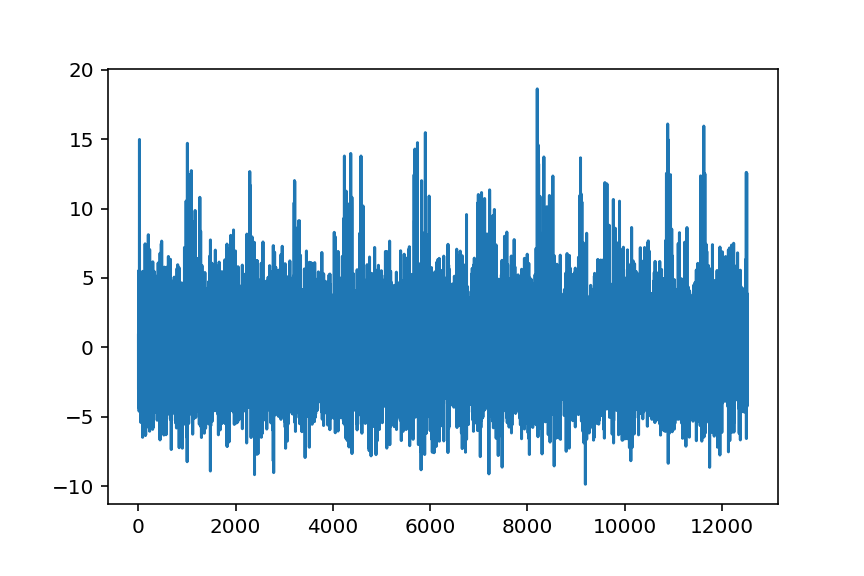

In [141]:
%matplotlib notebook
plt.plot(np.diff(trace1))

# Kill javabridge

In [ ]:
javabridge.kill_vm()